# **Ensemble Learning and Transfer Learning for Financial Price Prediction**

**Models Utilized:**
- *Bidirectional Probabilistic GRU (bi_gru_prob)*
- *Bidirectional Simple GRU (bi_gru_simple)*
- *Bidirectional GRU with Time-Distributed Dense (bi_gru_time_dist)*
- *Probabilistic GRU (gru_prob)*
- *Simple GRU (gru_simple)*
- *GRU with Time-Distributed Dense (gru_time_dist)*
- *Bidirectional Probabilistic LSTM (bi_lstm_prob)*
- *Bidirectional Simple LSTM (bi_lstm_simple)*
- *Bidirectional LSTM with Time-Distributed Dense (bi_lstm_time_dist)*
- *Probabilistic LSTM (lstm_prob)*
- *Simple LSTM (lstm_simple)*
- *LSTM with Time-Distributed Dense (lstm_time_dist)*

**Workflow Overview:**
1. **Data Preprocessing:**
   - *Download cryptocurrency price data, e.g., Bitcoin (BTC), using Yahoo Finance.*
   - *Normalize and split the data into training and testing sets.*

2. **Model Training:**
   - *Train various deep learning models (include probabilistic model) with different architectures on BTC price data.*
   - *Models include both GRU and LSTM variants.*

3. **Transfer Learning:**
   - *Utilize the best-performing model (e.g., gru_prob) as a pre-trained model.*
   - *Transfer this model to predict stock prices.*

4. **Evaluation and Analysis:**
   - *Evaluate model performance using metrics such as R2 score, Mean Absolute Percentage Error, and more.*
   - *Generate Residuals vs. Predicted Values plots for each model.*

5. **Reporting and Visualization:**
   - *Report and visualize the results, including prediction plots for different models.*


# Financial Time Series Analysis Setup: Import Necessary Libraries and Set Up the Environment for Financial Time Series Analysis.

## Install dependencies with correct version



TensorFlow: 2.15.1

Keras: 2.15.0

TensorFlow Probability: 0.23.0

Instruction: After installing the tensorflow 2.15.1 in the following cell, please click on "Restart session" to update the version of tensorflow in this notebook. Then comment the below cell, to make sure to not rerun this cell again in the new session. Run the next cells as usual.

In [ ]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.15.1

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? 
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.4 MB/s eta 0:00:00
  

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.1


In [ ]:
!pip install keras==2.15.0

In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
!pip install tensorflow-probability==0.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.25.0
    Uninstalling tensorflow-probability-0.25.0:
      Successfully uninstalled tensorflow-probability-0.25.0


In [ ]:
import tensorflow_probability
print(tensorflow_probability.__version__)

0.23.0


## Import Dependencies

In [ ]:
"""
Libraries:
- os: Operating system interaction.
- numpy: Numerical operations.
- pytz: Time zone support.
- pandas: Data manipulation and analysis.
- glob: Unix-style pathname pattern expansion.
- matplotlib.pyplot: Plotting library.
- matplotlib.dates: Date plotting functionality.
- datetime: Date and time manipulation.
- time: Time-related functions.
- warnings: Warning control.
- sklearn.metrics: Metrics for model evaluation.
- tensorflow and keras: Deep learning frameworks.
- tensorflow_probability: Library for probabilistic modeling.

Note: Adjustments such as turning off TensorFlow warnings and installing required packages are included.
"""

import os
import numpy as np
import pytz
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime, timedelta
import time
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_poisson_deviance as mpd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import PredictionErrorDisplay
import tensorflow as tf
import keras.backend as K
from keras.layers import Input, LSTM, Dense, BatchNormalization, Dropout
from keras.layers import Activation, TimeDistributed, Flatten, GRU, Bidirectional
from keras.models import Model, model_from_json, load_model
from keras.callbacks import Callback, EarlyStopping
from tensorflow_probability.python.layers import DistributionLambda
from tensorflow_probability.python.distributions import Normal

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings('ignore')
# plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
%matplotlib inline

# Download Price Data from Yahoo Finance

## Install Yahoo Finance's API

In [ ]:
%pip install yfinance

In [ ]:
import yfinance as yf

## Download Bitcoin data from yfinance

In [ ]:
def download_price_data(timezone = None, date_format = '%Y-%m-%d %H:%M', tickers = 'BTC-USD'):
    """
    Description:
    - Fetch historical price data for specified tickers from Yahoo Finance.
    - Adjusts the data for a specific timezone and custom date format.

    Parameters:
    - timezone (str): Target timezone for data conversion.
    - date_format (str): Custom date format for the 'Datetime' column.
    - tickers (str or list): Ticker symbols of financial instruments to download.

    Returns:
    - pd.DataFrame: Historical price data with adjusted datetime and 'AdjClose' column.

    Note:
    - Ensure 'yfinance' library is installed using '%pip install yfinance'.
    """
    d = yf.download(tickers = tickers,
                    start = datetime.now() - timedelta(days = 60) + timedelta(minutes = 5),
                    end = datetime.now(), interval = '5m')
    d = (d.tz_convert(timezone)).rename(columns = {'Adj Close': 'AdjClose'}).copy(deep = True)
    d['Datetime'] = pd.date_range(start = datetime.strftime(d.index[0], date_format), periods = len(d), freq = '5min')
    d['Datetime'] = d['Datetime'].dt.strftime(date_format)
    d.set_index('Datetime', inplace = True)
    print(f'Downloaded from {d.index[0]} to {d.index[-1]} with total {len(d.index)} samples')
    return d

## Set Iran Timezone and Date Format

In [ ]:
"""
Description:
- Defines the timezone for Iran and a custom date format.

Variables:
- timezone (pytz.timezone): Represents the timezone for Ho Chi Minh city, Vietnam.
- dateformat (str): Custom date format to be used in datetime manipulations.
"""
timezone = pytz.timezone(zone = 'Asia/Ho_Chi_Minh')
dateformat = '%Y-%m-%d %H:%M'

## Download BTC Price Data.

In [ ]:
"""
Description:
- Downloads historical price data for a specified cryptocurrency (default is BTC-USD).
- The data is fetched within the last 60 days with a 5-minute interval.

Parameters:
- timezone (pytz.timezone): Timezone to convert the data timestamps.
- date_format (str): Custom date format for timestamp display.
- tickers (str): Cryptocurrency ticker symbol. (default is BTC-USD)

Returns:
- pd.DataFrame: Historical price data with adjusted close values and timestamps.
"""
data = download_price_data(timezone = timezone, date_format = dateformat)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Downloaded from 2025-02-03 22:55 to 2025-04-04 22:50 with total 17280 samples


In [ ]:
data.columns = ['Open','High','Low','Close','Volume']

In [ ]:
data

Open          High           Low         Close  \
Datetime                                                                   
2025-02-03 22:55  99271.710938  99302.578125  99089.382812  99089.382812   
2025-02-03 23:00  98857.171875  99131.789062  98857.171875  99054.585938   
2025-02-03 23:05  98476.664062  98893.039062  98455.226562  98893.039062   
2025-02-03 23:10  98559.101562  98559.101562  98368.984375  98498.945312   
2025-02-03 23:15  98652.921875  98652.921875  98441.812500  98640.492188   
...                        ...           ...           ...           ...   
2025-04-04 22:30  83421.445312  83421.445312  83157.210938  83157.210938   
2025-04-04 22:35  82786.664062  82893.367188  82697.546875  82893.367188   
2025-04-04 22:40  82964.664062  83003.562500  82571.101562  82708.914062   
2025-04-04 22:45  83099.585938  83099.585938  82754.781250  82889.679688   
2025-04-04 22:50  83131.296875  83162.945312  83131.296875  83162.945312   

                      Volume  
Datetime                      
2025-02-03 22:55           0  
2025-02-03 23:00   162512896  
2025-02-03 23:05   273063936  
2025-02-03 23:10   288464896  
2025-02-03 23:15   271204352  
...                      ...  
2025-04-04 22:30   161677312  
2025-04-04 22:35   157683712  
2025-04-04 22:40  1288732672  
2025-04-04 22:45   456544256  
2025-04-04 22:50           0  

[17280 rows x 5 columns]

In [ ]:
data.describe()

Open           High            Low          Close  \
count   17280.000000   17280.000000   17280.000000   17280.000000   
mean    89243.210209   89293.345669   89193.356845   89243.743005   
std      6176.240373    6171.766816    6181.227769    6177.385377   
min     76901.398438   76985.281250   76653.531250   76808.101562   
25%     83967.673828   84005.693359   83920.695312   83966.240234   
50%     87004.476562   87065.265625   86950.460938   87007.718750   
75%     96222.101562   96254.753906   96192.654297   96226.746094   
max    102514.171875  102514.171875  102247.468750  102420.531250   

             Volume  
count  1.728000e+04  
mean   1.771284e+08  
std    4.013057e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.543068e+08  
max    8.659169e+09

# Visualizing Downloaded Data

## Matplotlib Plotting Configuration

In [ ]:
"""
Description:
- Configure Matplotlib plotting settings for consistent and visually appealing financial time series plots.

Settings:
- Figure size: Adjust the default size for figures.
- Font size: Set the font size for text in plots.
- Axes title size: Define the title font size for axes.
- Axes label size: Specify the font size for axes labels.
- X-axis tick label size: Set the font size for tick labels on the x-axis.
- Y-axis tick label size: Set the font size for tick labels on the y-axis.
- Legend font size: Adjust the font size for legends.

Usage:
- Apply these settings at the beginning of financial time series analysis scripts to enhance plot readability.
"""
plt.rcParams.update({'figure.figsize': [18, 6],
                     'font.size':       16,
                     'axes.titlesize':  16,
                     'axes.labelsize':  16,
                     'xtick.labelsize': 16,
                     'ytick.labelsize': 16,
                     'legend.fontsize': 16})

## Plot Downloaded BTC Price Data

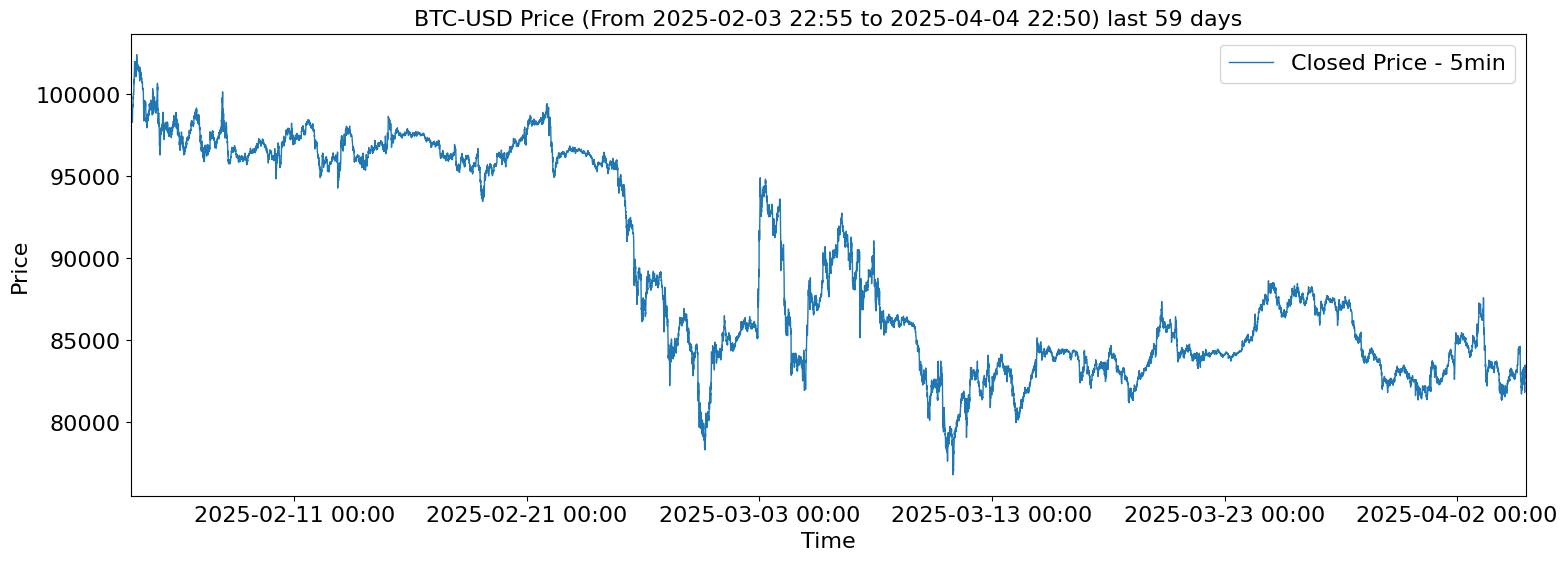

In [ ]:
"""
Description:
- Plots the historical closed price of a cryptocurrency.
- The x-axis is formatted with a custom date formatter.

Parameters:
- data (pd.DataFrame): Historical price data with timestamps and closed prices.
- dateformat (str): Custom date format for timestamp display.
"""
dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index]

plt.gca().xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
plt.plot(dates, list(data['Close']), label = 'Closed Price - 5min', linewidth = 1)
plt.xlim([dates[0], dates[-1]])
plt.title('BTC-USD Price (From {} to {}) last {} days'
.format(data.index[0], data.index[-1], (datetime.strptime(data.index[-1], dateformat) - datetime.strptime(data.index[0], dateformat)).days))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Function Declarations

## Methods For Normalize And Denormalize Data

In [ ]:
def normalize(x_, minmax):
    """
    Description:
    - Normalizes input data within the specified min-max range.

    Parameters:
    - x_ (np.ndarray): Input data to be normalized.
    - minmax (np.ndarray): Array containing the minimum and maximum values.

    Returns:
    - np.ndarray: Normalized data.
    """
    return (x_ - minmax[0]) / (minmax[1] - minmax[0])

def denormalize(x_, minmax):
    """
    Description:
    - Denormalizes input data based on the specified min-max range.

    Parameters:
    - x_ (np.ndarray): Input data to be denormalized.
    - minmax (np.ndarray): Array containing the minimum and maximum values used.

    Returns:
    - np.ndarray: Denormalized data.
    """
    return minmax[0] + ((minmax[1] - minmax[0]) * x_)

## Bidirectional Probabilistic GRU

In [ ]:
def bi_gru_prob(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Probabilistic Gated Recurrent Unit (GRU) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Probabilistic GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

## Bidirectional Simple GRU Model with Regularization and Batch Normalization

In [ ]:
def bi_gru_simple(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Simple Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Simple GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Bidirectional Time Distributed GRU Model with Regularization and Batch Normalization

In [ ]:
def bi_gru_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Time Distributed Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Time Distributed GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True))(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Probabilistic GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_prob(shape = None, name = None):
    """
    Description:
    - Construct a Probabilistic Gated Recurrent Unit (GRU) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Probabilistic GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

## Simple GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_simple(shape = None, name = None):
    """
    Description:
    - Construct a Simple Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Simple GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Time Distributed GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Time Distributed Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Time Distributed GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True)(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Bidirectional Probabilistic LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_prob(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Probabilistic Long Short-Term Memory (LSTM) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Probabilistic LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

## Bidirectional Simple LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_simple(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Simple Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Simple LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Bidirectional Time Distributed LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Time Distributed Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Time Distributed LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True))(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Probabilistic LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_prob(shape = None, name = None):
    """
    Description:
    - Construct a Probabilistic Long Short-Term Memory (LSTM) model with regularization, batch normalization, and distribution output.
    The distribution is defined as a Normal distribution with the predicted values (loc) and a scale parameter derived from a softplus
    function applied to the predicted values. This approach is employed for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Probabilistic LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

## Simple LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_simple(shape = None, name = None):
    """
    Description:
    - Construct a simple Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Simple LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Time Distributed LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Time Distributed Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Time Distributed LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True)(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Method for Retrieving the Index of a Specific Layer.

In [ ]:
def get_layer_index(model_layers, layer_name):
    for idx, layer in enumerate(model_layers):
        if layer.name == layer_name:
            return idx

## Define a Custom Callback to Monitor and Track the R2-Score on the Validation Dataset.

In [ ]:
class TrainingCallback(Callback):
    """
    Description:
    - [TrainingCallback] Custom Callback for Monitoring and Managing Training Process
    This callback monitors the training process, tracks the R2 score, and saves the best model based on R2 improvement on validation dataset.

    Parameters:
    - check_best (bool): Whether to check and save the best model based on the highest R2 score.
    - change_lr (bool): Whether to change the learning rate during training.
    - change_lr_freq (int): Frequency of learning rate changes.
    - model_dir (str): Directory to save the best model and training history.
    - model_name (str): Name of the best model file.
    - valid_data (tuple): Validation data in the form of (valid_X, valid_y).
    - model (tf.keras.Model): The main model being trained.

    Methods:
    - on_train_begin: Called at the start of training.
    - on_train_end: Called at the end of training.
    - on_epoch_begin: Called at the beginning of each epoch.
    - on_epoch_end: Called at the end of each epoch.

    The callback saves the best model based on R2 score and logs the training progress in a text file.
    """
    def __init__(self,
                 check_best = True,
                 model_dir = None,
                 model_name = 'best_r2_model',
                 valid_data = None,
                 model = None):
        super(TrainingCallback).__init__()
        if valid_data is None: raise ValueError('You have to define validation data: e.g. valid_data = (valid_X, valid_y)!')
        if model is None: raise ValueError('You have to define model: e.g. model = your_model_name!')
        self.check_best = check_best
        self.price_r2, self.valid_X, self.valid_y = 0.0, valid_data[0], valid_data[1]
        if model_dir is None:
            self.best_model_dir = os.path.join(os.getcwd(), 'best_model').replace('\\', '/')
        else:
            self.best_model_dir = model_dir
        if not os.path.isdir(self.best_model_dir): os.makedirs(self.best_model_dir)
        self.best_model_name = model_name
        self.save_best = False
        self.model = model
        self.model_ = None
        self.time = 0
        self.text_file = None

    def on_train_begin(self, logs = None, **kwargs):
        self.text_file = open(f'{self.best_model_dir}_history.txt', 'w')
        if self.check_best:
            self.model.save(f'{self.best_model_dir}/{self.best_model_name}.keras')
            self.model_ = load_model(f'{self.best_model_dir}/{self.best_model_name}.keras', safe_mode = False)
        c = {True: 'On', False: 'Off'}
        text = f'Training started. Checking the best model based on the highest R2-score is {c[self.check_best]}'
        self.text_file.writelines(text + '\n')
        print(text)

    def on_train_end(self, logs = None, **kwargs):
        self.text_file.close()

    def on_epoch_begin(self, epoch, logs = None, **kwargs):
        self.time = time.time()

    def on_epoch_end(self, epoch, logs = None, **kwargs):
        if self.check_best:
            price_check = 'Model Weights Not Changed'
            self.save_best = False
            pred_ = self.model.predict(self.valid_X)
            if np.array(pred_.shape).shape[0] > 1:
                price_r2_ = r2_score(self.valid_y.flatten(), np.mean(pred_, axis = 1))
            else:
                price_r2_ = r2_score(self.valid_y, pred_)
            if price_r2_ > self.price_r2:
                self.model_ = load_model(f'{self.best_model_dir}/{self.best_model_name}.keras', safe_mode = False)
                price_check = 'Model Weights Changed'
                self.price_r2, self.save_best = price_r2_, True
                for layer in self.model.layers:
                    if layer.weights:
                        layer_idx = get_layer_index(self.model_.layers, layer.name)
                        self.model_.layers[layer_idx].set_weights(self.model.layers[layer_idx].get_weights())
            if self.params['epochs'] > 9:
                e = str(int((10 * self.params['epochs']) + epoch + 1))[1:]
            else:
                e = epoch + 1
            t = str(timedelta(seconds = int(time.time() - self.time)))
            if self.save_best:
                self.model_.save(f'{self.best_model_dir}/{self.best_model_name}.keras')
                if 'val_loss' in logs.keys():
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f}, val_loss: {:.4f} | {} And Best Model Saved'.format(e,
                                                                                                                                          self.params['epochs'],
                                                                                                                                          t,
                                                                                                                                          price_r2_,
                                                                                                                                          logs['loss'],
                                                                                                                                          logs['val_loss'],
                                                                                                                                          price_check)
                else:
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f} | {} And Best Model Saved'.format(e,
                                                                                                                        self.params['epochs'],
                                                                                                                        t, price_r2_,
                                                                                                                        logs['loss'],
                                                                                                                        price_check)
            else:
                if 'val_loss' in logs.keys():
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f}, val_loss: {:.4f} | {}'.format(e,
                                                                                                                     self.params['epochs'],
                                                                                                                     t,
                                                                                                                     price_r2_,
                                                                                                                     logs['loss'],
                                                                                                                     logs['val_loss'],
                                                                                                                     price_check)
                else:
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f} | {}'.format(e,
                                                                                                   self.params['epochs'],
                                                                                                   t,
                                                                                                   price_r2_,
                                                                                                   logs['loss'],
                                                                                                   price_check)
            self.text_file.writelines(text + '\n')
            print(text)

## Transfer Model for Probabilistic Prediction with Fine-Tuning (trained model on BTC price data)

In [ ]:
def transfer_model(transfer_model_path = None, transfer_model_name = None, name = 'best_TRXPred_gru_prob'):
    """
    Description:
    - Load a pre-trained model, freeze layers, and create a new model for transfer learning with fine-tuning.

    Parameters:
    - transfer_model_path (str): Path to the directory containing the pre-trained model.
    - transfer_model_name (str): Name of the pre-trained model file.
    - name (str): Name for the new transfer model.

    Returns:
    - tf.keras.Model: Compiled transfer model with fine-tuning for probabilistic prediction.
    """
    # Default values for transfer model path and name
    if transfer_model_path is None:
        transfer_model_path = 'best_BTCPred_gru_prob'
    if transfer_model_name is None:
        transfer_model_name = 'best_BTCPred_gru_prob'

    # Load the pre-trained model
    m = load_model(f'{transfer_model_path}/{transfer_model_name}.keras', safe_mode = False)

    # Freeze layers except the last one
    for layer in m.layers[:-3]:
        layer.trainable = False

    # Set a new name for the transfer model
    m._name = name

    # Compile the transfer model with a specified optimizer and loss function (NLL)
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

## Data Splitting for Time Series Prediction

In [ ]:
def split_data(close_price = None, training_len = None, testing_len = None, analyzing_duration = None):
    """
    Description:
    - Split time series data into training and testing sets for sequence prediction.

    Parameters:
    - close_price (numpy.ndarray): Time series data of closing prices.
    - training_len (int): Length of the training set.
    - testing_len (int): Length of the testing set.
    - analyzing_duration (int): Duration of the sequence used for prediction.

    Returns:
    - tuple: Tuple containing training and testing sets (train_X, train_y, test_X, test_y).
      - train_X (numpy.ndarray): Training input sequences.
      - train_y (numpy.ndarray): Training output values.
      - test_X (numpy.ndarray): Testing input sequences.
      - test_y (numpy.ndarray): Testing output values.
    """
    # Initialize lists to store training and testing data
    train_X, train_y = [], []
    test_X, test_y = [], []

    # Generate training sequences and corresponding output values
    for idx in range(training_len - analyzing_duration):
        train_X.append(close_price[idx:analyzing_duration + idx].reshape(analyzing_duration))
        train_y.append(close_price[idx + analyzing_duration])

    # Reshape training data into the required format
    train_X, train_y = np.asarray(train_X).reshape((len(train_X), analyzing_duration, 1)), np.asarray(train_y)

    # Generate testing sequences and corresponding output values
    for idx in range(training_len - analyzing_duration, training_len + testing_len - analyzing_duration):
        test_X.append(close_price[idx:analyzing_duration + idx].reshape(analyzing_duration))
        test_y.append(close_price[idx + analyzing_duration])

    # Reshape testing data into the required format
    test_X, test_y = np.asarray(test_X).reshape((len(test_X), analyzing_duration, 1)), np.asarray(test_y)
    return train_X, train_y, test_X, test_y

## Plotting Time Series Prediction Results

In [ ]:
def plot_prediction(y_train, y_test, y_pred, model_name = None):
    """
    Description:
    - Generate a plot to visualize the results of time series prediction.

    Parameters:
    - y_train (numpy.ndarray): True values of the training set.
    - y_test (numpy.ndarray): True values of the testing set.
    - y_pred (numpy.ndarray): Predicted values, including mean and optional confidence interval.
    - model_name (str): Name of the model for plot title.

    Returns:
    - None: Displays the generated plot.
    """
    # Set up plot parameters
    plt.rcParams.update({'figure.figsize': [18, 6]})

    dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index[-len(y_test):]]

    fig, ax = plt.subplots(1)

    ax.xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
    ax.plot(dates, denormalize(y_test, close_minmax), label = 'Test', color = 'k', linewidth = 1)
    ax.plot(dates, denormalize(y_pred.mean(axis = 1), close_minmax), label = 'Prediction', color = 'r', linewidth = 1)
    if y_pred.shape[1] > 1:
        ax.fill_between(dates, denormalize(y_pred.mean(axis = 1) + .5 * y_pred.std(axis = 1), close_minmax),
                        denormalize(y_pred.mean(axis = 1) - .5 * y_pred.std(axis = 1), close_minmax),
                        alpha = .25, label = 'Prediction Bounds', color = 'c')
    ax.set_xlim([dates[0], dates[-1]])
    ax.set_title(f'Best Model: {model_name}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    ax.tick_params(axis = 'x', rotation = 15)
    ax.legend()
    plt.show()

# Data Preprocessing

## Model Training Configuration

In [ ]:
"""
Description:
- Configuration settings for training the time series prediction models.

Parameters:
- test_split_percentage (float): Percentage of data reserved for testing.
- validation_split_percentage (float): Percentage of training data used for validation.
- epochs (int): Number of training epochs.
- batch_size (int): Batch size for training.
- verbose (int): Verbosity level during training (0 for silent).
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
test_split_percentage = .8
validation_split_percentage = .2
epochs = 20
batch_size = 32
verbose = 0
analysis_duration = 6
price_pairs = 'BTCUSD'

## Price Preprocessing and Normalization Parameters

In [ ]:
"""
Parameters for normalizing cryptocurrency closing prices:
- alpha (float): Scaling factor for the minimum value.
- beta (float): Scaling factor for the maximum value.
- close_price (numpy.ndarray): NumPy array containing closing prices.
- data_len (int): Total length of the price data.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
"""
alpha, beta = .8, 1.2
close_price = pd.Series.to_numpy(data['Close'])
data_len = close_price.shape[0]
train_len = int((test_split_percentage * data_len) // analysis_duration * analysis_duration)
test_len = int(data_len - train_len)
close_minmax = np.array([alpha * close_price.min(), beta * close_price.max()], dtype = 'float32')

## Price Normalization and Save

In [ ]:
"""
Description:
- Normalize the closing prices of cryptocurrency data and save the min-max normalization range.

Parameters:
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- data_len (int): Total length of the price data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
close_price = close_price.reshape((data_len, 1)).astype('float32')
close_price = normalize(close_price, close_minmax)
np.save(f'close_minmax_{price_pairs.lower()}.npy', close_minmax)

## Data Splitting for Training and Validation

In [ ]:
"""
Description:
- Split the time series data into training, testing, and validation sets for model training.

Parameters:
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and testing data split.
- X_val, y_val (numpy.ndarray): Validation data split from the training set.
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- validation_split_percentage (float): Percentage of training data used for validation.
- analyzing_duration (int): Duration of the sequence used for prediction.
"""
X_train, y_train, X_test, y_test = split_data(close_price = close_price,
                                              training_len = train_len,
                                              testing_len = test_len,
                                              analyzing_duration = analysis_duration)
X_val, y_val = X_train[int(train_len - (validation_split_percentage * train_len)):], y_train[int(train_len - (validation_split_percentage * train_len)):]
X_train, y_train = X_train[:int(train_len - (validation_split_percentage * train_len))], y_train[:int(train_len - (validation_split_percentage * train_len))]

# Model Training

## Base Models Dictionary

In [ ]:
"""
Description:
- Dictionary containing base model names as keys and corresponding model functions as values.
These models are used as building blocks for constructing more complex models and architectures in the workflow.
"""
base_models_list = {
    'bi_gru_prob':          bi_gru_prob,
    'bi_gru_simple':        bi_gru_simple,
    'bi_gru_time_dist':     bi_gru_time_dist,
    'gru_prob':             gru_prob,
    'gru_simple':           gru_simple,
    'gru_time_dist':        gru_time_dist,
    'bi_lstm_prob':         bi_lstm_prob,
    'bi_lstm_simple':       bi_lstm_simple,
    'bi_lstm_time_dist':    bi_lstm_time_dist,
    'lstm_prob':            lstm_prob,
    'lstm_simple':          lstm_simple,
    'lstm_time_dist':       lstm_time_dist
}

## Train Multiple Base Models, Evaluate Their Performance on the Test Set, and Store the Results.

In [ ]:
"""
Parameters:
- base_models_list (dict): Dictionary containing base model functions.
- X_train, y_train (numpy.ndarray): Training data and labels.
- X_test, y_test (numpy.ndarray): Testing data and labels.
- X_val, y_val (numpy.ndarray): Validation data and labels.
- close_minmax (numpy.ndarray): Min-max values for denormalization.
- epochs (int): Number of training epochs.
- batch_size (int): Size of each training batch.
- verbose (int): Verbosity mode for training output.
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): String identifier for the price pair.

Returns:
- y_pred_best (dict): Predictions from the best models.
- models_test_result (dict): Evaluation metrics for each trained model on the test set.
"""

y_pred_best, models_test_result = {}, {}

for selected_model in list(base_models_list.items()):
    m_name_ = f'best_{price_pairs[:3]}Pred_{selected_model[0]}'
    models_test_result.update({f'{m_name_}': {}})
    if os.path.isfile(f'{m_name_[:-2]}_history.npy'):
        continue
    out_path = m_name_.replace('best_', '')
    if not os.path.isdir(out_path): os.makedirs(out_path)
    out_path_best = m_name_

    K.clear_session()
    model = selected_model[1](**{'shape': X_train.shape[1:], 'name': price_pairs.lower()})
    model.summary(line_length = 140)

    tbcall = TrainingCallback(model_dir = out_path_best,
                              valid_data = (X_val, y_val),
                              model = model, model_name = m_name_)

    model_history = model.fit(X_train, y_train,
                              epochs = epochs, batch_size = batch_size, callbacks = tbcall, verbose = verbose)

    model.save(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')
    best_model = load_model(f'{out_path_best}/{m_name_}.keras', safe_mode = False)

    test_p = model.predict(X_test)
    test_p_best = best_model.predict(X_test)
    y_pred_best.update({f'{m_name_}': test_p_best})

    models_test_result[f'{m_name_}'].update({'r2_score': float(r2_score(denormalize(y_test, close_minmax),
                                                                        denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_absolute_percentage_error': float(mape(denormalize(y_test, close_minmax),
                                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'explained_variance_score': float(evs(denormalize(y_test, close_minmax),
                                                                                   denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_squared_log_error': float(msle(denormalize(y_test, close_minmax),
                                                                                  denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_poisson_deviance': float(mpd(denormalize(y_test, close_minmax),
                                                                                denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'max_error': float(max_error(denormalize(y_test, close_minmax),
                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_absolute_error': float(mae(denormalize(y_test, close_minmax),
                                                                              denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'root_mean_squared_error': float(rmse(denormalize(y_test, close_minmax),
                                                                                   denormalize(test_p_best.mean(axis = 1), close_minmax)))})

Model: "bi_gru_prob_btcusd"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 close_price (InputLayer)                                      [(None, 6, 1)]                                          0                    
                                                                                                                                            
 bidirectional (Bidirectional)                                 (None, 512)                                             397824               
                                                                                                                                            
 batch_normalization (BatchNormalization)                      (None, 512)                                             2048   

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 2s 11ms/step


Epoch: 01/20 | 0:00:24 | Price R2 score: 0.0512 | loss: 1395.3964 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 02/20 | 0:00:07 | Price R2 score: 0.2459 | loss: 192.1724 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 6ms/step
Epoch: 03/20 | 0:00:07 | Price R2 score: -12.8226 | loss: 20.8850 | Model Weights Not Changed
87/87 [==============================] - 1s 9ms/step
Epoch: 04/20 | 0:00:08 | Price R2 score: 0.9586 | loss: 7.4593 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:07 | Price R2 score: 0.9737 | loss: 8.2693 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 06/20 | 0:00:07 | Price R2 score: 0.1555 | loss: 5.4655 | Model Weights Not Changed
87/87 [==============================] - 1s 9ms/step
Epoch: 07/20 | 0:00:07 | Price R2 score: 0.8364 | loss: 4.49

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 7ms/step
Epoch: 01/20 | 0:00:13 | Price R2 score: -58.6701 | loss: 1.1775 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 02/20 | 0:00:07 | Price R2 score: -47.2714 | loss: 0.2272 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 03/20 | 0:00:07 | Price R2 score: -1.8076 | loss: 0.2204 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step


Epoch: 04/20 | 0:00:07 | Price R2 score: 0.9561 | loss: 0.2215 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 05/20 | 0:00:07 | Price R2 score: -0.1253 | loss: 0.2210 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 06/20 | 0:00:08 | Price R2 score: 0.4340 | loss: 0.2196 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 07/20 | 0:00:07 | Price R2 score: 0.9802 | loss: 0.2219 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 08/20 | 0:00:08 | Price R2 score: 0.8495 | loss: 0.2212 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 09/20 | 0:00:07 | Price R2 score: 0.9634 | loss: 0.2205 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 10/20 | 0:00:06 | Price R2 score: 0.9668 | loss: 0.2203 | Model Weights Not Changed
87/87 [===

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 6ms/step
Epoch: 01/20 | 0:00:13 | Price R2 score: -33.5482 | loss: 1.1088 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 02/20 | 0:00:08 | Price R2 score: -48.8246 | loss: 0.2400 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 03/20 | 0:00:07 | Price R2 score: -1.6504 | loss: 0.2237 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:08 | Price R2 score: -0.4927 | loss: 0.2229 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 05/20 | 0:00:08 | Price R2 score: -2.5545 | loss: 0.2226 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step


Epoch: 06/20 | 0:00:08 | Price R2 score: 0.5007 | loss: 0.2227 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 07/20 | 0:00:09 | Price R2 score: 0.6450 | loss: 0.2225 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 08/20 | 0:00:08 | Price R2 score: 0.1206 | loss: 0.2228 | Model Weights Not Changed
87/87 [==============================] - 1s 10ms/step
Epoch: 09/20 | 0:00:09 | Price R2 score: 0.9089 | loss: 0.2225 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 10/20 | 0:00:08 | Price R2 score: -0.2735 | loss: 0.2228 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 11/20 | 0:00:09 | Price R2 score: 0.6339 | loss: 0.2218 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 12/20 | 0:00:09 | Price R2 score: -1.6372 | loss: 0.2221 | Model Weights Not

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 4ms/step


Epoch: 01/20 | 0:00:08 | Price R2 score: 0.0401 | loss: 1384.3939 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 02/20 | 0:00:05 | Price R2 score: 0.6373 | loss: 187.3045 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 03/20 | 0:00:05 | Price R2 score: -0.2119 | loss: 15.4460 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 04/20 | 0:00:04 | Price R2 score: -19.9272 | loss: 4.3243 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: -25.9957 | loss: 3.9351 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:04 | Price R2 score: -123.2991 | loss: 3.3373 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:04 | Price R2 score: -75.5462 | loss: 2.9402 | Model Weights Not Cha

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 4ms/step
Epoch: 01/20 | 0:00:07 | Price R2 score: -36.6232 | loss: 0.7038 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 02/20 | 0:00:05 | Price R2 score: -30.0172 | loss: 0.1396 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 03/20 | 0:00:04 | Price R2 score: -0.2543 | loss: 0.1197 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 04/20 | 0:00:04 | Price R2 score: 0.7433 | loss: 0.1189 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: -1.4372 | loss: 0.1178 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:04 | Price R2 score: 0.8967 | loss: 0.1181 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 07/20 | 0:00:05 | Price R2 score: 0.5206 | loss: 0.1181 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 08/20 | 0:00:04 | Price R2 score: 0.9194 | loss: 0.1179 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 09/20 | 0:00:04 | Price R2 score: 0.9840 | loss: 0.1179 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 10/20 | 0:00:05 | Price R2 score: 0.2041 | loss: 0.1191 | Mo

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 4ms/step
Epoch: 01/20 | 0:00:07 | Price R2 score: -47.6822 | loss: 0.6924 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 02/20 | 0:00:05 | Price R2 score: -36.5514 | loss: 0.1426 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 03/20 | 0:00:04 | Price R2 score: -11.5852 | loss: 0.1232 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 04/20 | 0:00:05 | Price R2 score: -2.3954 | loss: 0.1212 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 05/20 | 0:00:05 | Price R2 score: 0.9309 | loss: 0.1208 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 06/20 | 0:00:05 | Price R2 score: -0.9988 | loss: 0.1199 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:04 | Price R2 score: 0.8501 | loss: 0.1209 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 08/20 | 0:00:04 | Price R2 score: 0.7338 | loss: 0.1199 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 09/20 | 0:00:05 | Price R2 score: 0.7967 | loss: 0.1198 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 10/20 | 0:00:04 | Price R2 score: -1.2448 | loss: 0.1209 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 11/20 | 0:00:05 | Price R2 score: -1.7229 | loss: 0.1201 | Model Weights Not Changed
87/87 [==================

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 2s 8ms/step


Epoch: 01/20 | 0:00:16 | Price R2 score: 0.0549 | loss: 1365.5586 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 02/20 | 0:00:11 | Price R2 score: 0.7446 | loss: 192.1111 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 03/20 | 0:00:10 | Price R2 score: -6.9580 | loss: 20.1323 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 04/20 | 0:00:10 | Price R2 score: -13.5909 | loss: 7.6931 | Model Weights Not Changed
87/87 [==============================] - 1s 12ms/step
Epoch: 05/20 | 0:00:10 | Price R2 score: -5.0588 | loss: 5.5559 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 06/20 | 0:00:09 | Price R2 score: -19.4821 | loss: 6.8115 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 07/20 | 0:00:10 | Price R2 score: -31.4685 | loss: 5.1294 | Model Weights Not Chan

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 7ms/step
Epoch: 01/20 | 0:00:15 | Price R2 score: -40.6132 | loss: 1.8793 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 02/20 | 0:00:11 | Price R2 score: -57.2070 | loss: 0.5730 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 03/20 | 0:00:10 | Price R2 score: -7.0901 | loss: 0.3894 | Model Weights Not Changed
87/87 [==============================] - 1s 12ms/step
Epoch: 04/20 | 0:00:10 | Price R2 score: -0.4830 | loss: 0.2868 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step


Epoch: 05/20 | 0:00:10 | Price R2 score: 0.5907 | loss: 0.2841 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 06/20 | 0:00:09 | Price R2 score: -0.6880 | loss: 0.2831 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 07/20 | 0:00:11 | Price R2 score: 0.9427 | loss: 0.2834 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 08/20 | 0:00:11 | Price R2 score: 0.9542 | loss: 0.2838 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 09/20 | 0:00:11 | Price R2 score: 0.9627 | loss: 0.2836 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 10/20 | 0:00:11 | Price R2 score: 0.9818 | loss: 0.2827 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 11/20 | 0:00:10 | Price R2 score: 0.9123 | 

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 2s 8ms/step
Epoch: 01/20 | 0:00:16 | Price R2 score: -29.2424 | loss: 1.6063 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 02/20 | 0:00:11 | Price R2 score: -41.2330 | loss: 0.5619 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 03/20 | 0:00:10 | Price R2 score: -7.3369 | loss: 0.3759 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 04/20 | 0:00:11 | Price R2 score: -1.6939 | loss: 0.2858 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step


Epoch: 05/20 | 0:00:11 | Price R2 score: 0.5692 | loss: 0.2855 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 06/20 | 0:00:11 | Price R2 score: -0.3495 | loss: 0.2850 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 07/20 | 0:00:11 | Price R2 score: 0.6881 | loss: 0.2854 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 08/20 | 0:00:11 | Price R2 score: -0.0342 | loss: 0.2847 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 09/20 | 0:00:14 | Price R2 score: -0.8168 | loss: 0.2852 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 10/20 | 0:00:11 | Price R2 score: -1.0666 | loss: 0.2845 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 11/20 | 0:00:11 | Price R2 score: 0.9709 | loss: 0.2850 | Model Weights Changed And Best Mo

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 5ms/step


Epoch: 01/20 | 0:00:10 | Price R2 score: 0.0534 | loss: 1349.6534 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 02/20 | 0:00:07 | Price R2 score: 0.6948 | loss: 185.5352 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 03/20 | 0:00:05 | Price R2 score: -0.9037 | loss: 15.3759 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:06 | Price R2 score: 0.4341 | loss: 3.5475 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: 0.8140 | loss: 3.4974 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 06/20 | 0:00:06 | Price R2 score: 0.8044 | loss: 3.1519 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 07/20 | 0:00:05 | Price R2 score: 0.7900 | loss: 2.9103 | Model Weights

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 5ms/step
Epoch: 01/20 | 0:00:08 | Price R2 score: -65.9084 | loss: 0.9325 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 02/20 | 0:00:06 | Price R2 score: -31.6083 | loss: 0.2971 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step


Epoch: 03/20 | 0:00:05 | Price R2 score: 0.6228 | loss: 0.1977 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:06 | Price R2 score: 0.7898 | loss: 0.1513 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: 0.6919 | loss: 0.1501 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 06/20 | 0:00:06 | Price R2 score: 0.9584 | loss: 0.1499 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 07/20 | 0:00:05 | Price R2 score: 0.9763 | loss: 0.1494 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 08/20 | 0:00:06 | Price R2 score: 0.9151 | loss: 0.1494 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 09/20 | 0:00:05 | Price R2 score: 0.8983 | loss: 0.1499 | Mod

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 5ms/step
Epoch: 01/20 | 0:00:08 | Price R2 score: -41.1491 | loss: 0.9597 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 02/20 | 0:00:06 | Price R2 score: -30.6060 | loss: 0.3137 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 03/20 | 0:00:05 | Price R2 score: -10.4866 | loss: 0.2062 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step


Epoch: 04/20 | 0:00:06 | Price R2 score: 0.8638 | loss: 0.1547 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 05/20 | 0:00:06 | Price R2 score: -3.7979 | loss: 0.1526 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 06/20 | 0:00:06 | Price R2 score: -11.2349 | loss: 0.1533 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 07/20 | 0:00:06 | Price R2 score: 0.2867 | loss: 0.1526 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 08/20 | 0:00:06 | Price R2 score: 0.9686 | loss: 0.1525 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 09/20 | 0:00:06 | Price R2 score: 0.2789 | loss: 0.1512 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 10/20 | 0:00:05 | Price R2 score: -2.2686 | loss: 0.1512 | Model Weights Not Changed
87/87 [

# Models Prediction and Evaluation

## Prediction visualization

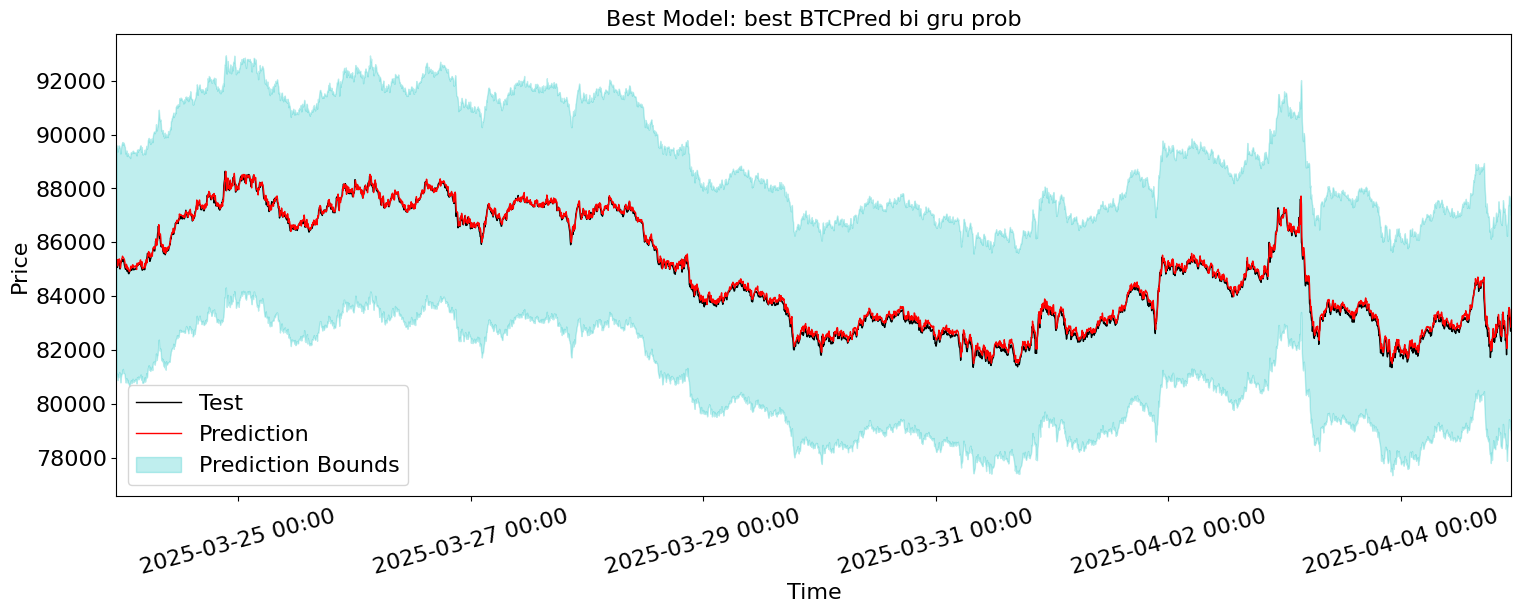

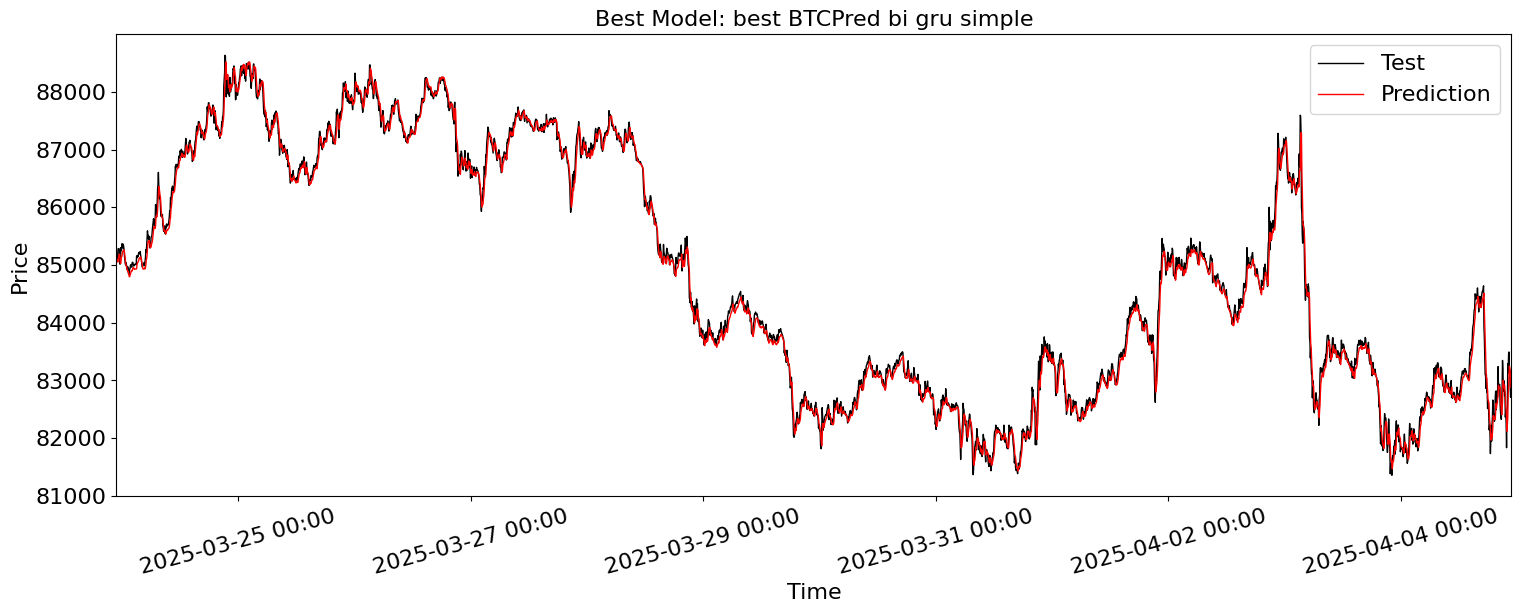

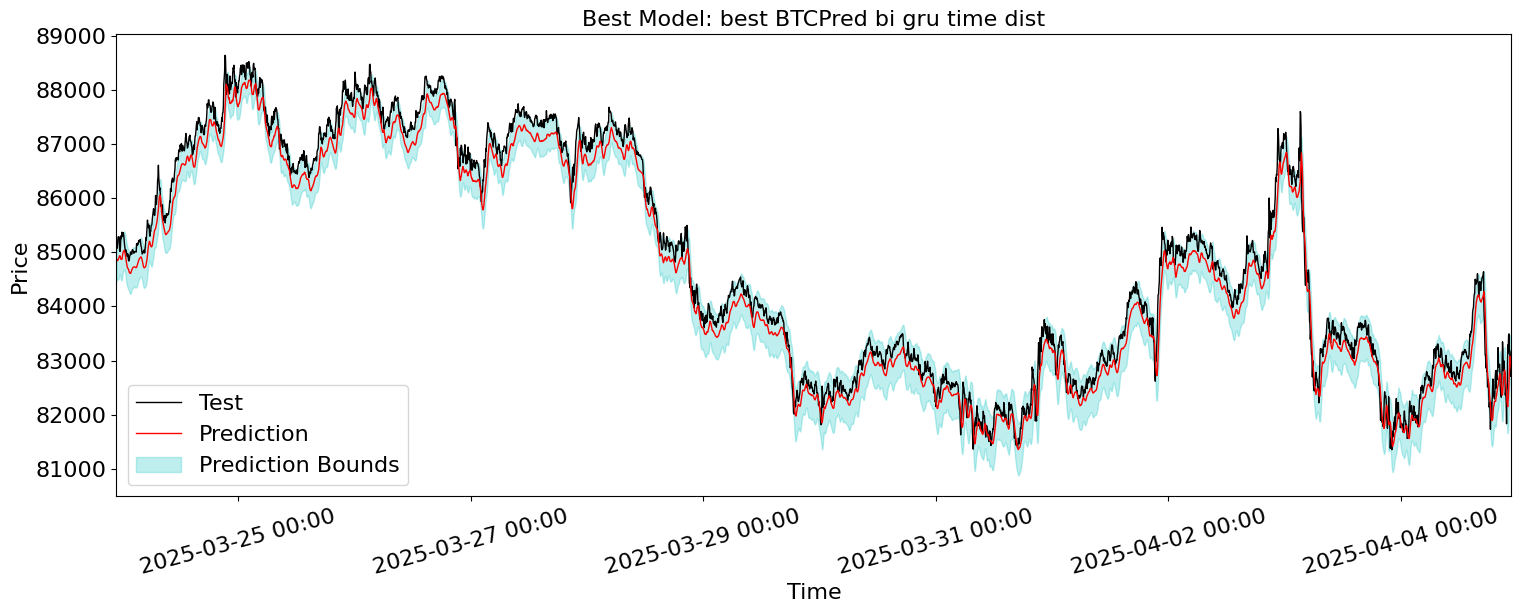

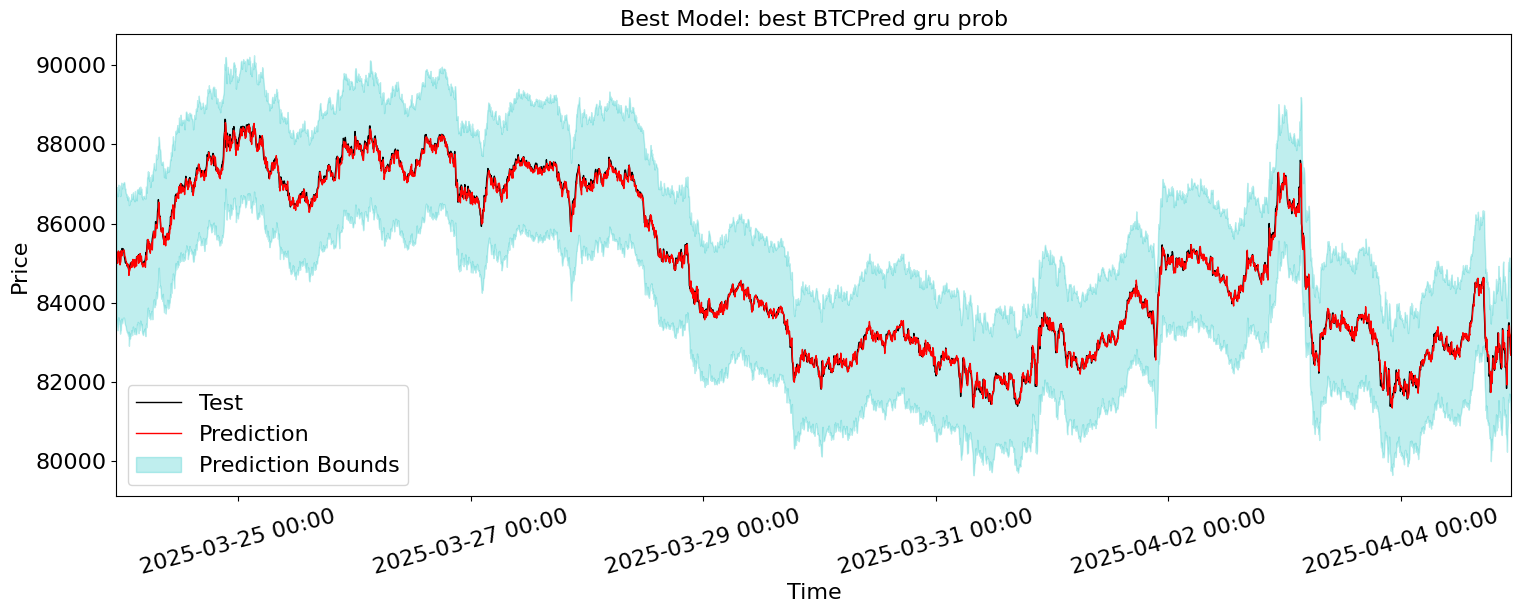

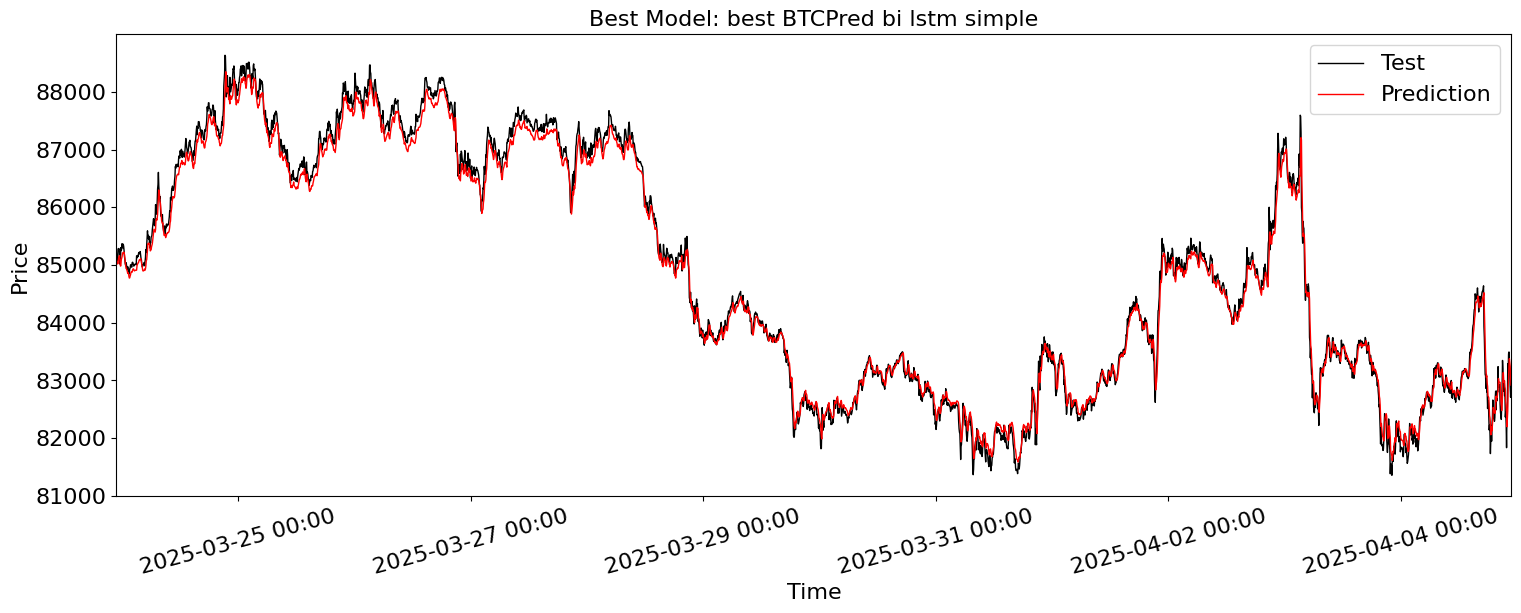

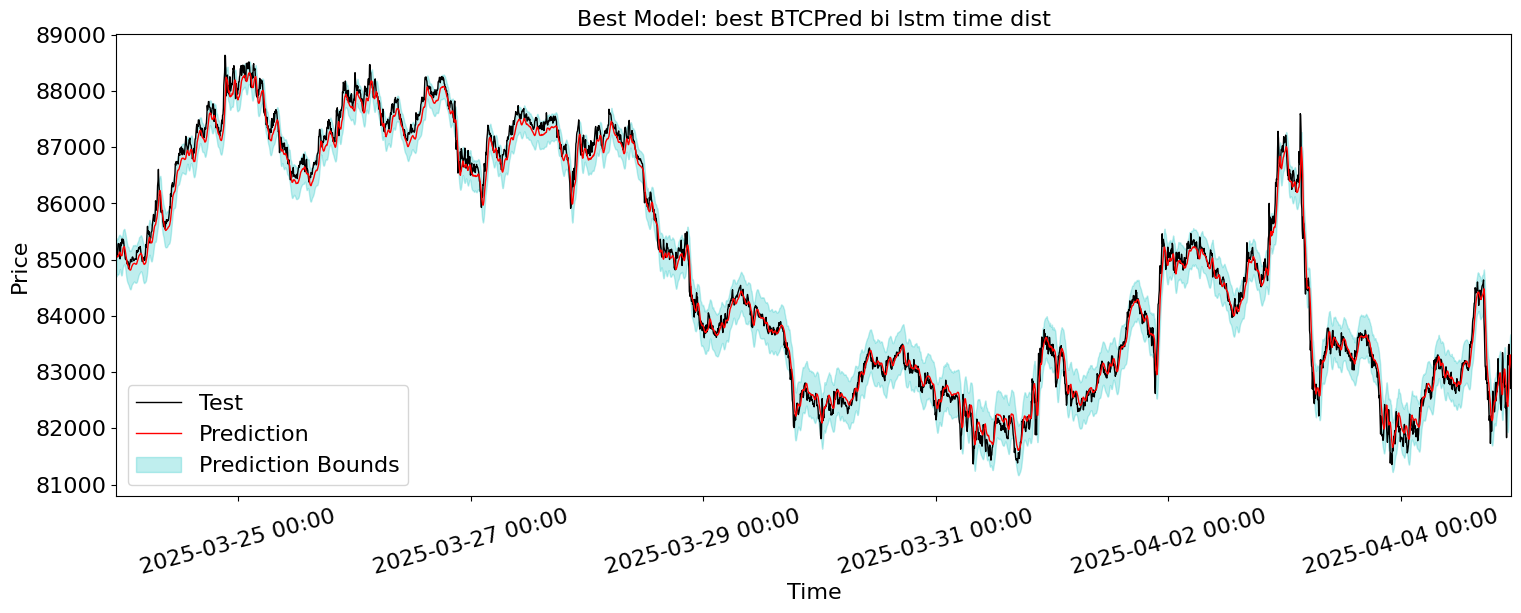

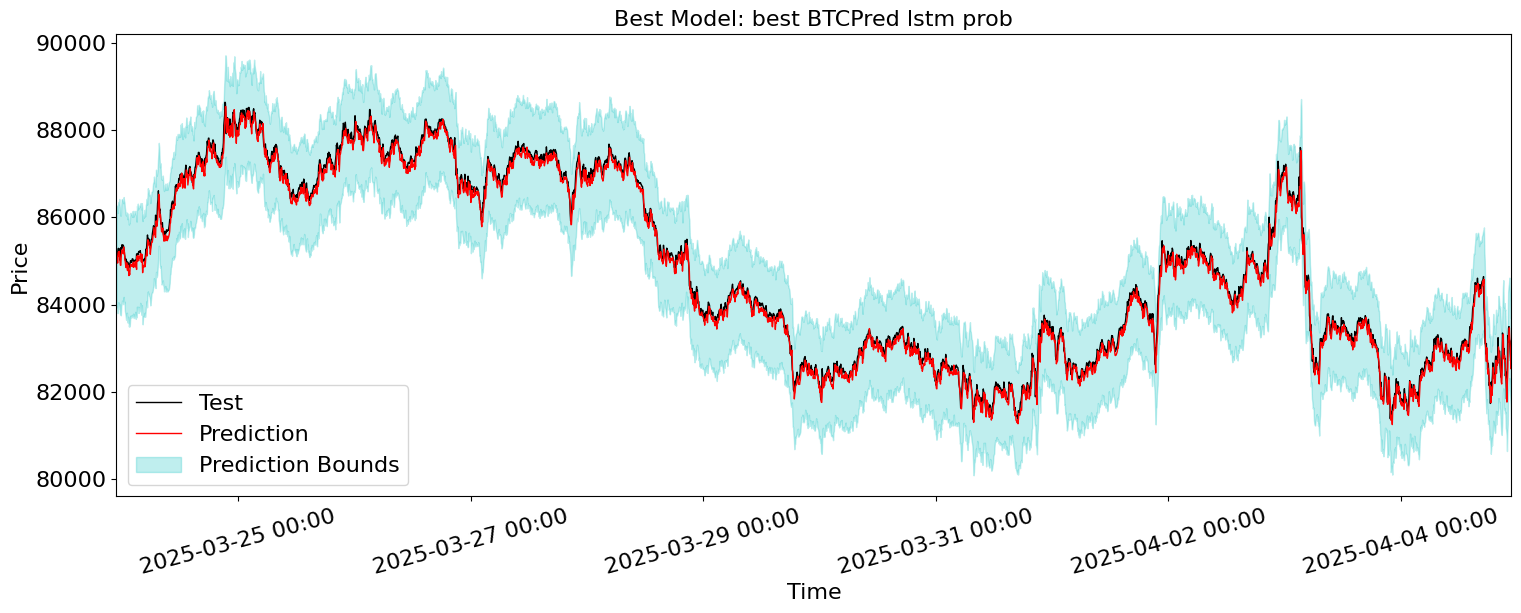

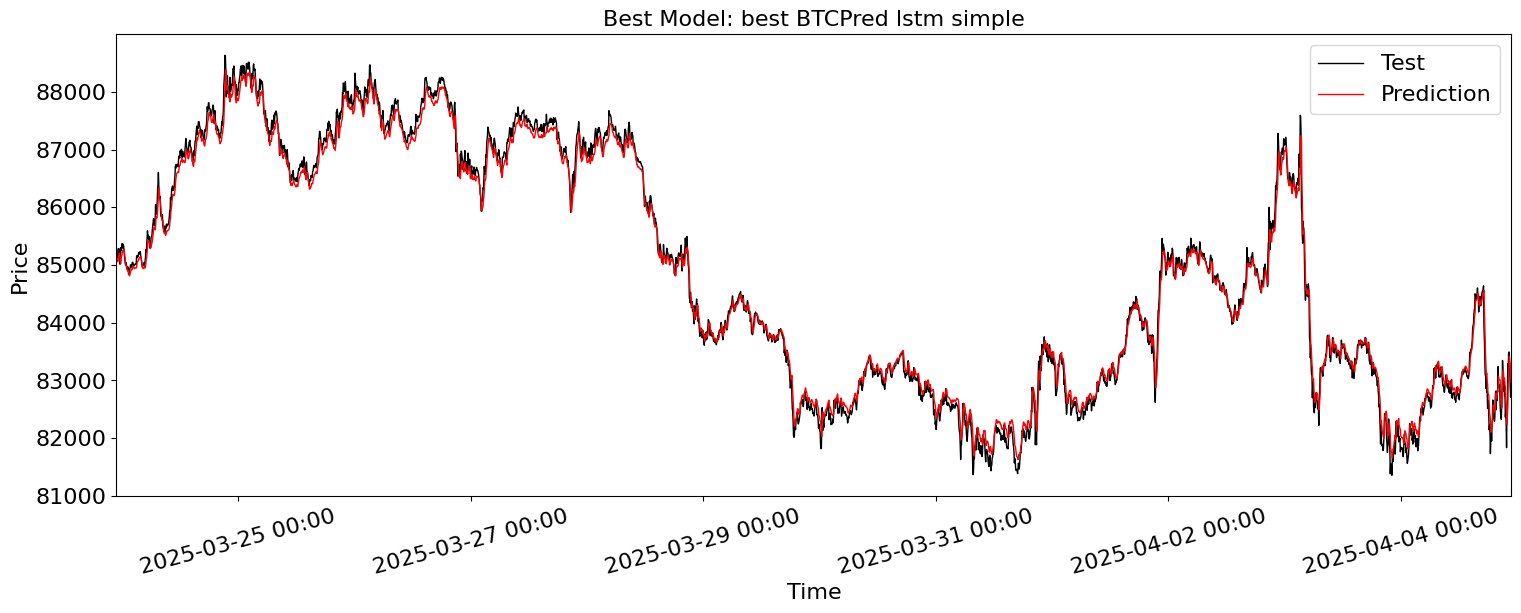

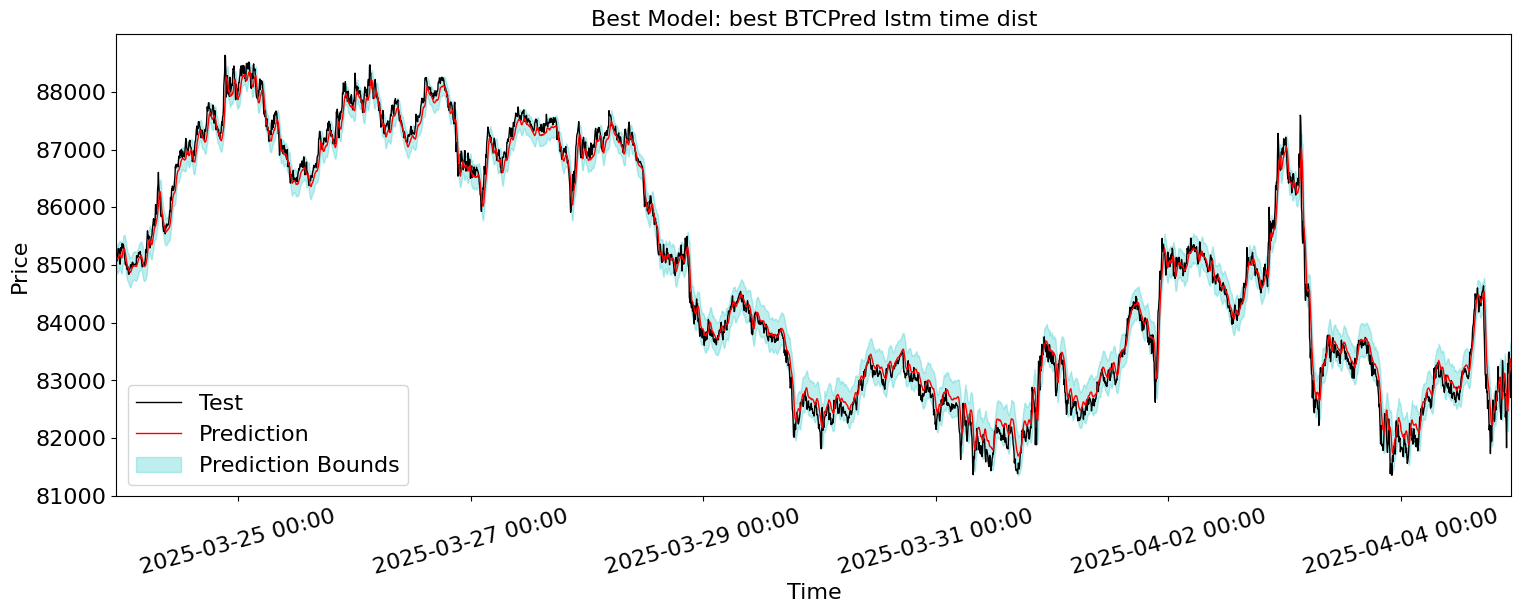

In [ ]:
"""
Description:
- Plots the prediction results for a specific model, including the test set and predicted values.

Parameters:
- y_train (numpy.ndarray): True values for the training set.
- y_test (numpy.ndarray): True values for the test set.
- y_pred (numpy.ndarray): Predicted values for the test set.
- model_name (str): Name of the model for labeling the plot.
- whole_data (bool): If True, includes the entire dataset in the plot (default is False).

Returns:
- None
"""
for model_name in y_pred_best.keys():
    plot_prediction(y_train, y_test, y_pred_best[model_name], model_name = model_name.replace('_', ' '))

## Residuals vs. Predicted Values Visualization

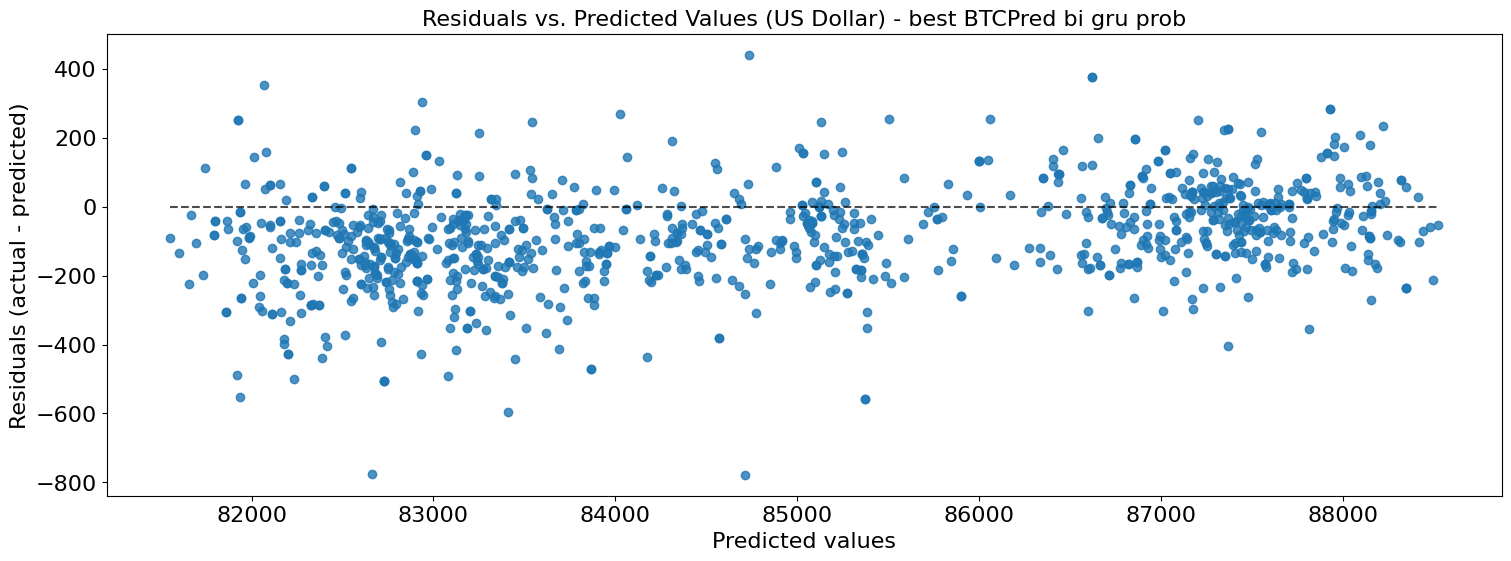

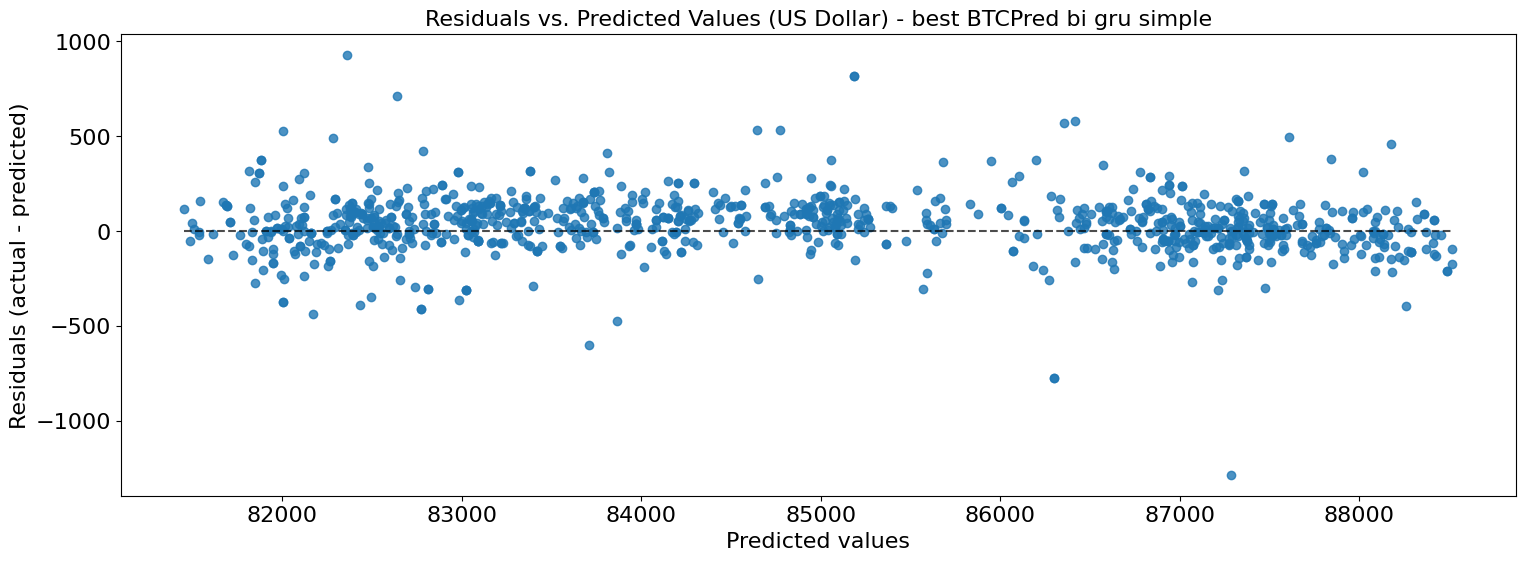

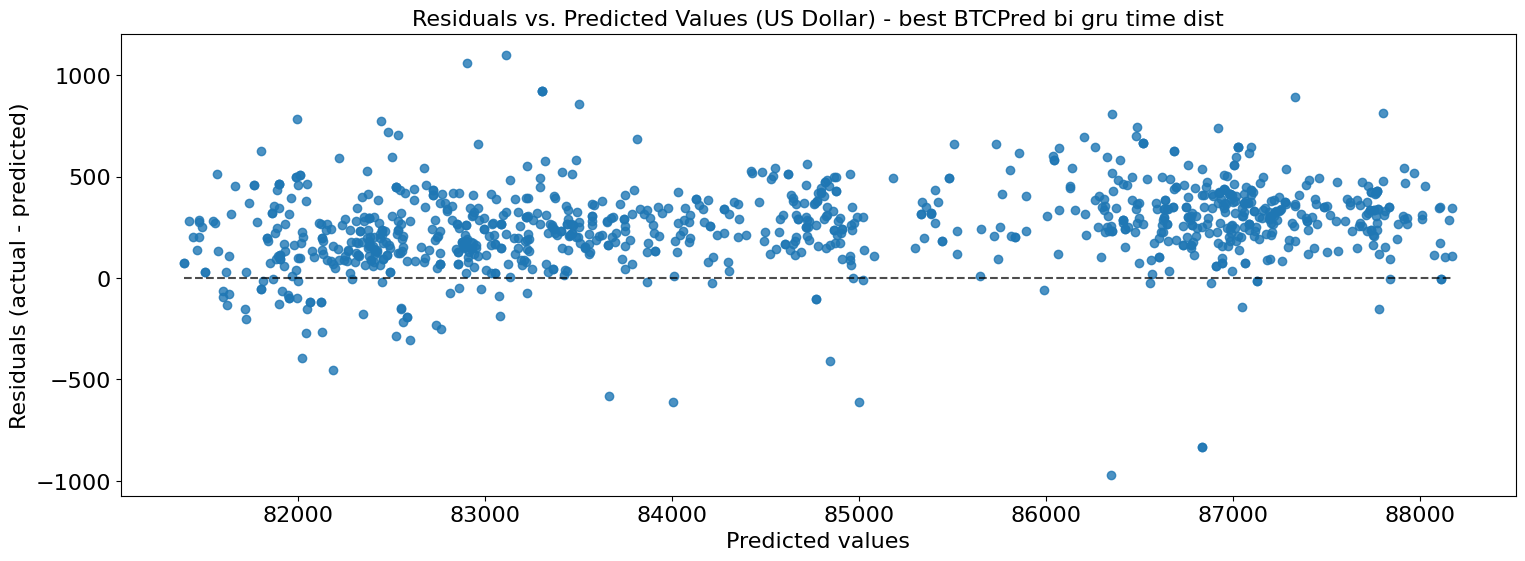

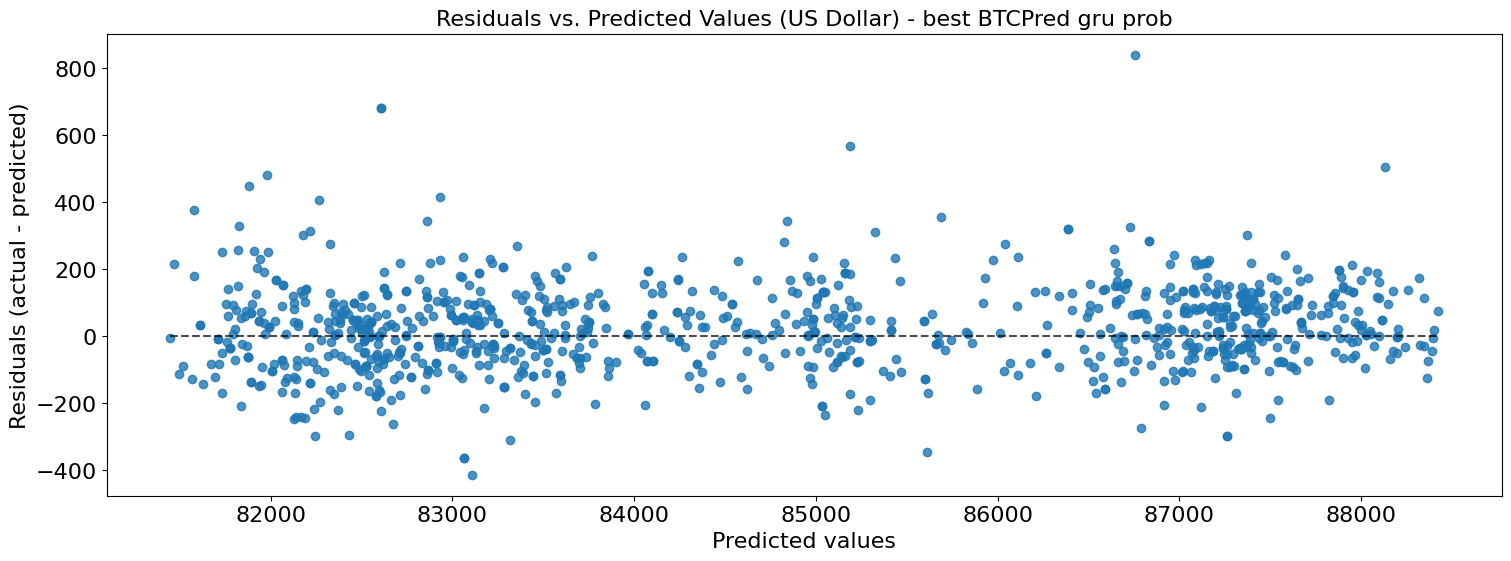

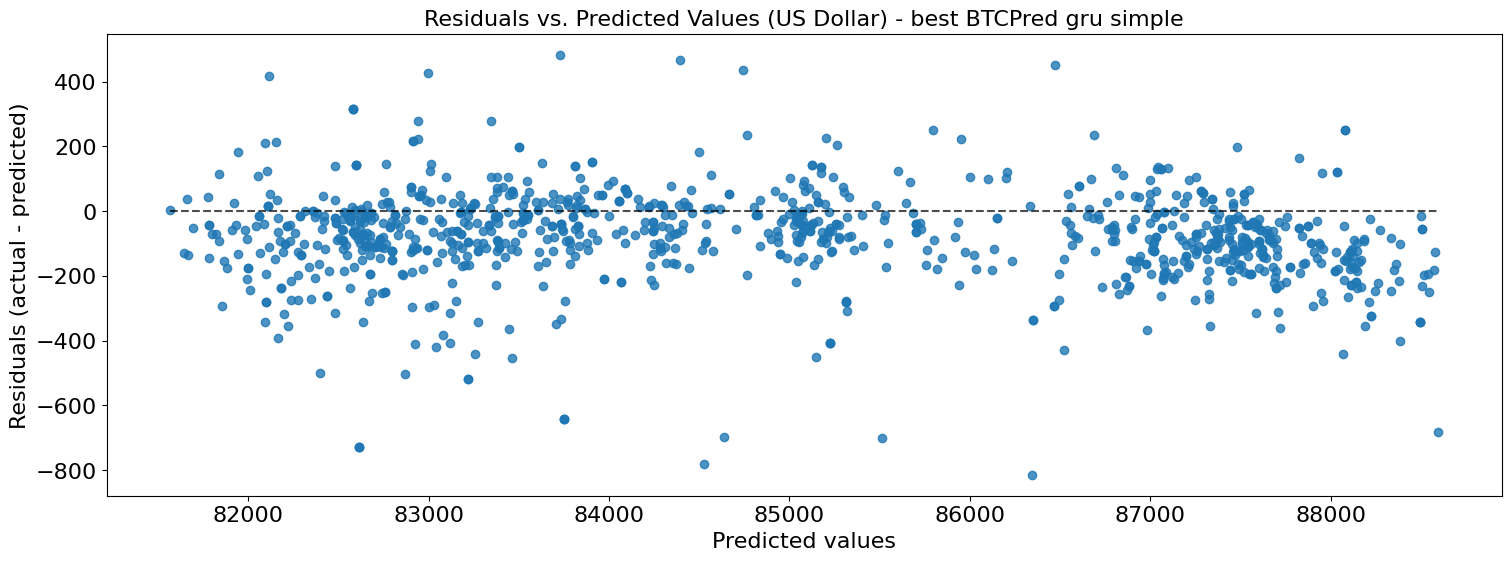

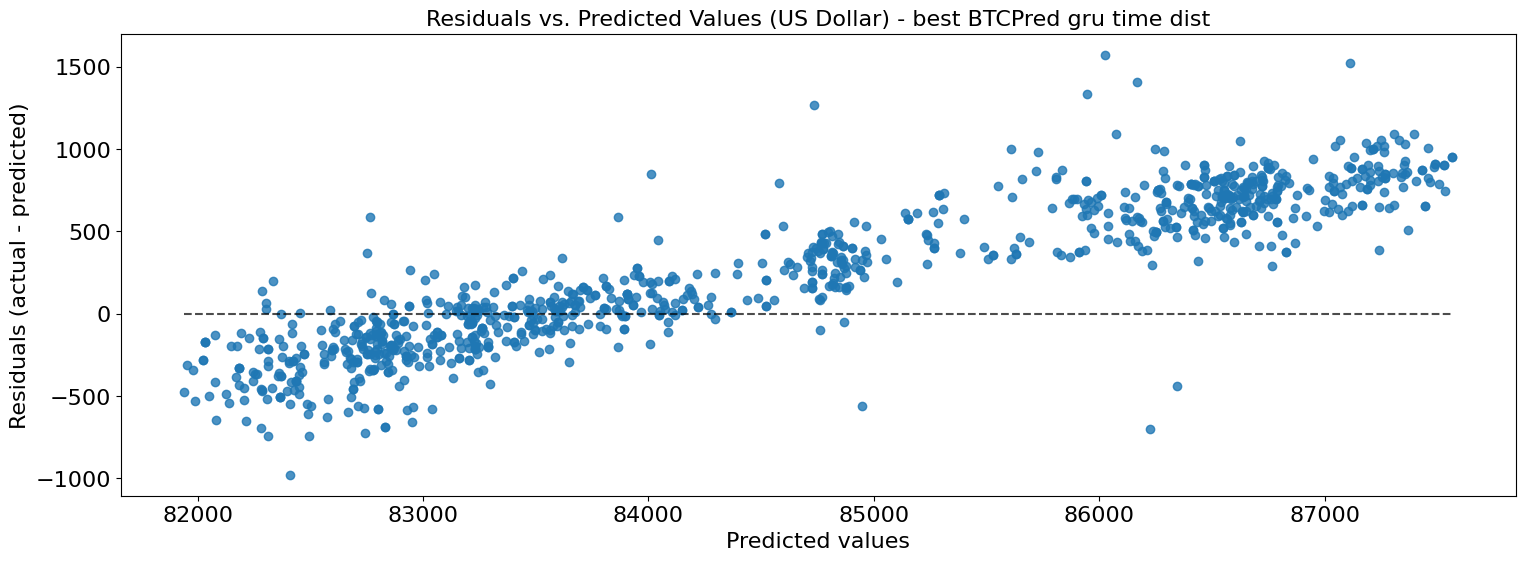

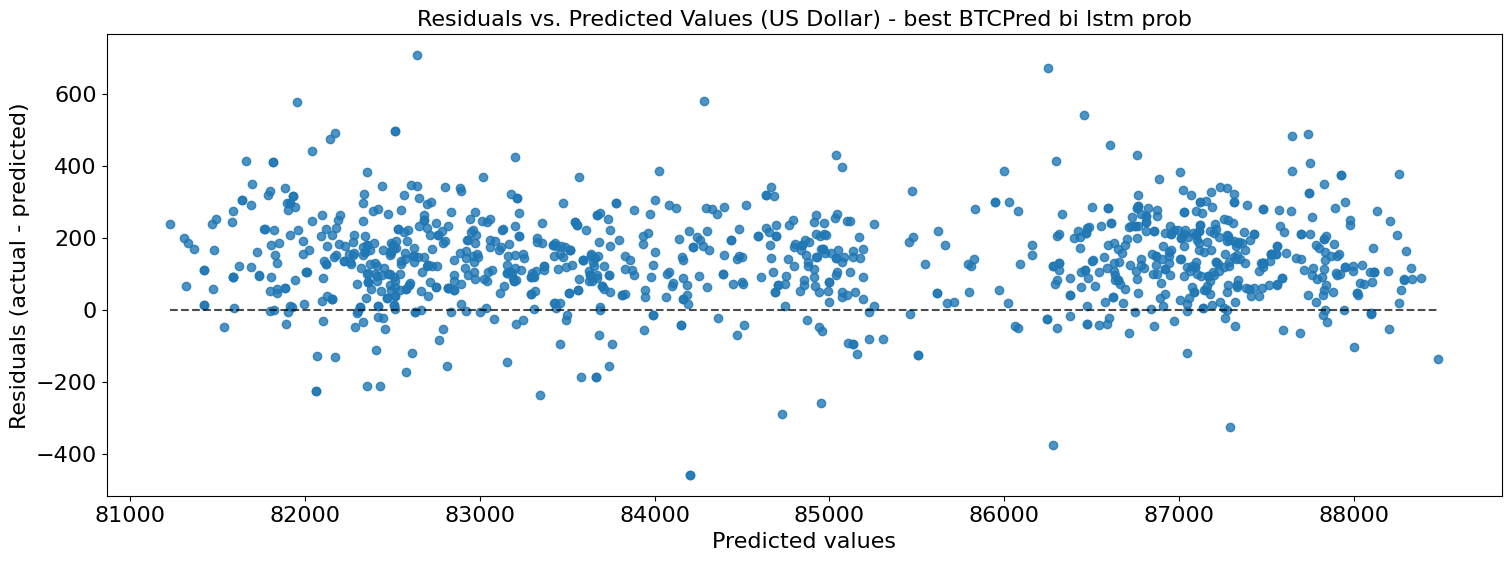

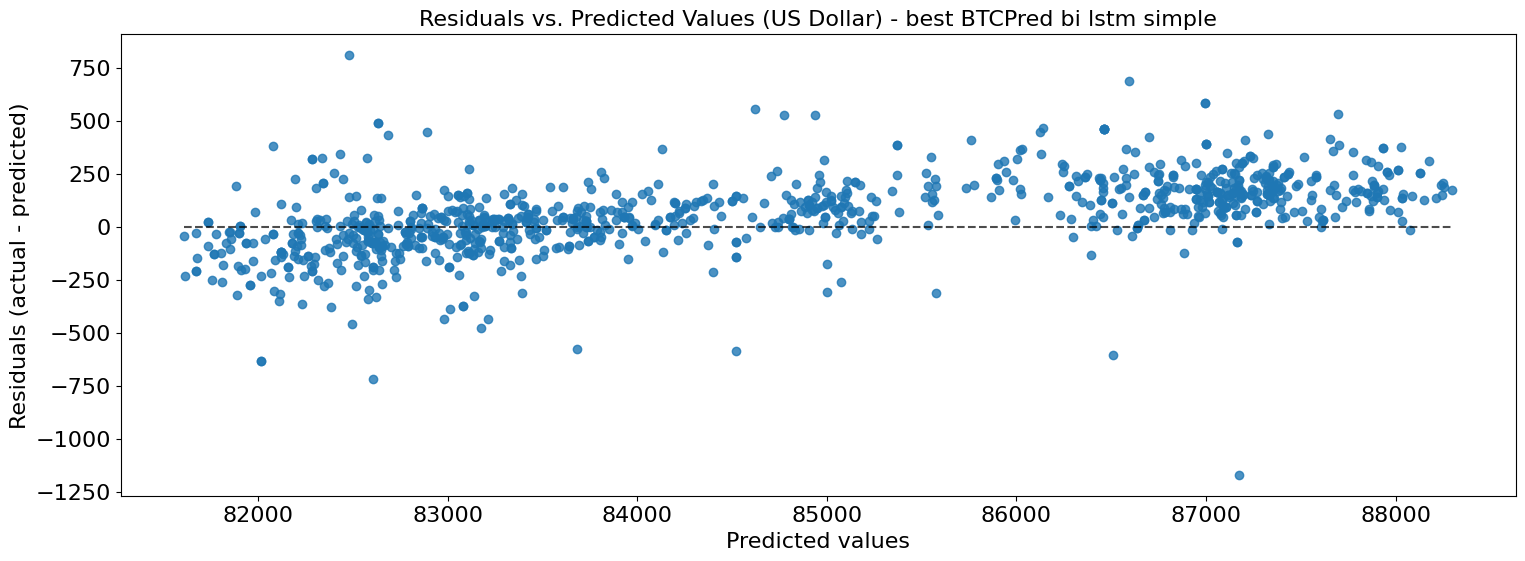

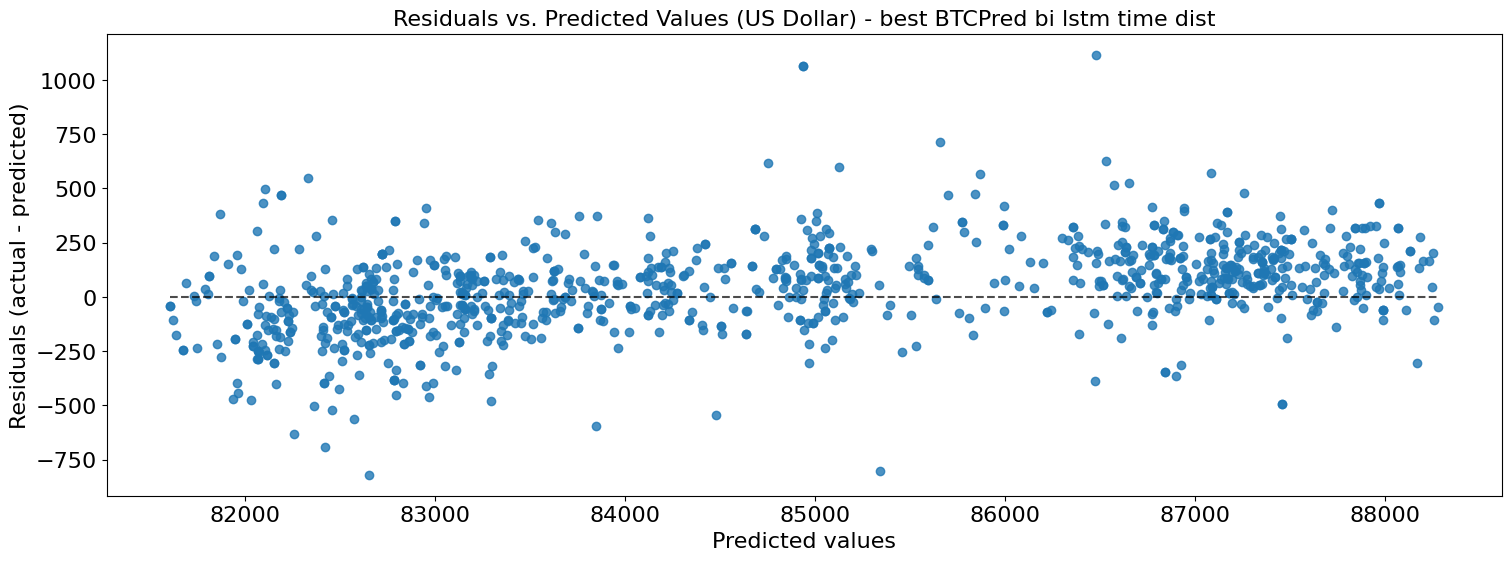

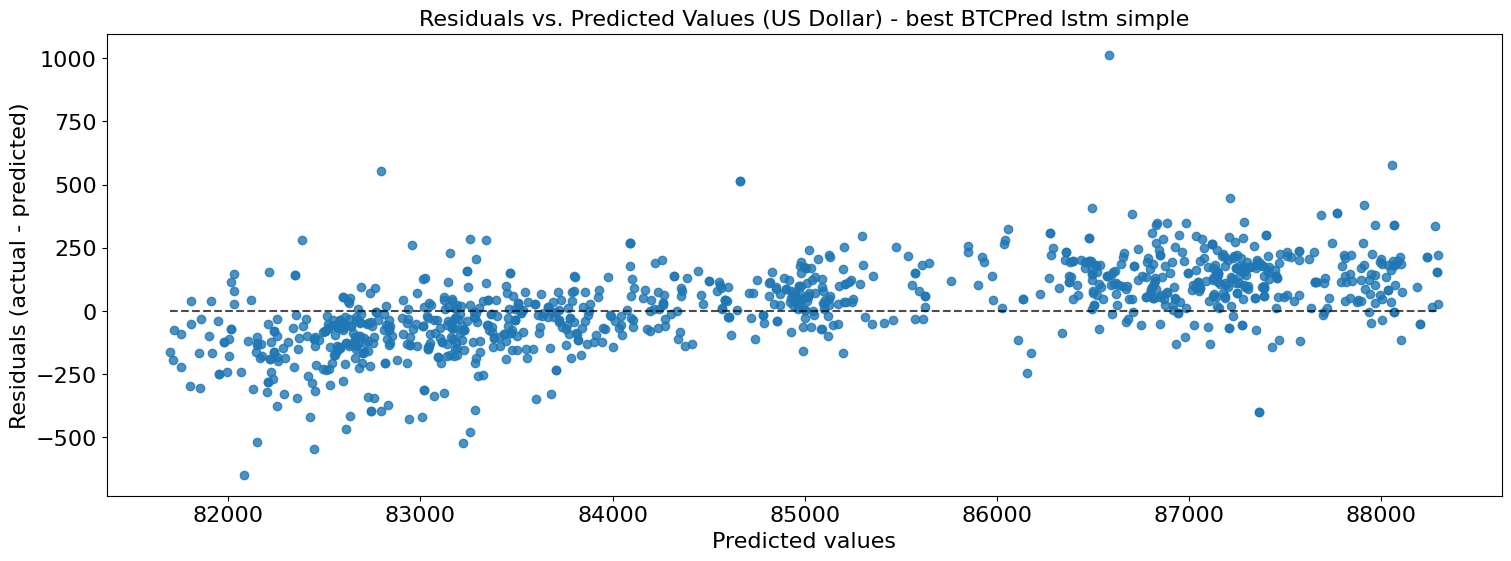

In [ ]:
"""
Description:
- Visualize the relationship between residuals and predicted values for each model.

Parameters:
- y_test (numpy.ndarray): True labels for the test set.
- y_pred_best (dict): Predictions from the best models.
- close_minmax (numpy.ndarray): Min-max values for denormalization.

Visualization:
- Residuals vs. Predicted Values plot displays the difference between true and predicted values against the predicted values.
- Each plot corresponds to a specific model, showcasing the model's performance in predicting price residuals.

Note: Residuals are the differences between the true and predicted values, providing insights into the model's accuracy.
"""
for model_name in y_pred_best.keys():
    PredictionErrorDisplay.from_predictions(y_true = denormalize(y_test, close_minmax),
                                            y_pred = denormalize(y_pred_best[model_name].mean(axis = 1), close_minmax)[:, np.newaxis])
    plt.title(f'Residuals vs. Predicted Values (US Dollar) - {model_name.replace("_", " ")}')
    plt.show()

## Models Evaluation Results

In [ ]:
df = pd.DataFrame.from_dict(models_test_result, orient = 'index')
df

r2_score  mean_absolute_percentage_error  \
best_BTCPred_bi_gru_prob        0.994287                        0.001439   
best_BTCPred_bi_gru_simple      0.995014                        0.001240   
best_BTCPred_bi_gru_time_dist   0.977130                        0.003160   
best_BTCPred_gru_prob           0.996183                        0.001111   
best_BTCPred_gru_simple         0.994455                        0.001356   
best_BTCPred_gru_time_dist      0.942237                        0.004724   
best_BTCPred_bi_lstm_prob       0.991655                        0.001839   
best_BTCPred_bi_lstm_simple     0.992874                        0.001596   
best_BTCPred_bi_lstm_time_dist  0.989870                        0.001815   
best_BTCPred_lstm_prob          0.993715                        0.001527   
best_BTCPred_lstm_simple        0.993479                        0.001512   
best_BTCPred_lstm_time_dist     0.989367                        0.001857   

                                explained_variance_score  \
best_BTCPred_bi_gru_prob                        0.995967   
best_BTCPred_bi_gru_simple                      0.995368   
best_BTCPred_bi_gru_time_dist                   0.991213   
best_BTCPred_gru_prob                           0.996275   
best_BTCPred_gru_simple                         0.995760   
best_BTCPred_gru_time_dist                      0.955488   
best_BTCPred_bi_lstm_prob                       0.996113   
best_BTCPred_bi_lstm_simple                     0.993709   
best_BTCPred_bi_lstm_time_dist                  0.990297   
best_BTCPred_lstm_prob                          0.996117   
best_BTCPred_lstm_simple                        0.993571   
best_BTCPred_lstm_time_dist                     0.989410   

                                mean_squared_log_error  mean_poisson_deviance  \
best_BTCPred_bi_gru_prob                      0.000003               0.289840   
best_BTCPred_bi_gru_simple                    0.000003               0.252035   
best_BTCPred_bi_gru_time_dist                 0.000013               1.148573   
best_BTCPred_gru_prob                         0.000002               0.192650   
best_BTCPred_gru_simple                       0.000003               0.279116   
best_BTCPred_gru_time_dist                    0.000033               2.866858   
best_BTCPred_bi_lstm_prob                     0.000005               0.421206   
best_BTCPred_bi_lstm_simple                   0.000004               0.356988   
best_BTCPred_bi_lstm_time_dist                0.000006               0.510304   
best_BTCPred_lstm_prob                        0.000004               0.317509   
best_BTCPred_lstm_simple                      0.000004               0.328636   
best_BTCPred_lstm_time_dist                   0.000006               0.538095   

                                  max_error  mean_absolute_error  \
best_BTCPred_bi_gru_prob        1414.234375           121.425583   
best_BTCPred_bi_gru_simple      1284.539062           105.051178   
best_BTCPred_bi_gru_time_dist   1295.000000           269.284698   
best_BTCPred_gru_prob           1270.710938            94.227470   
best_BTCPred_gru_simple         1438.312500           115.081215   
best_BTCPred_gru_time_dist      1571.789062           405.842194   
best_BTCPred_bi_lstm_prob       1250.421875           156.123047   
best_BTCPred_bi_lstm_simple     1169.187500           136.027802   
best_BTCPred_bi_lstm_time_dist  1218.242188           154.173065   
best_BTCPred_lstm_prob          1269.687500           129.581970   
best_BTCPred_lstm_simple        1205.539062           128.357361   
best_BTCPred_lstm_time_dist     1250.000000           157.133194   

                                root_mean_squared_error  
best_BTCPred_bi_gru_prob                     156.297287  
best_BTCPred_bi_gru_simple                   146.021637  
best_BTCPred_bi_gru_time_dist                312.722382  
best_BTCPred_gru_prob                        127.761360  
best_BTCPred_gru_simple          

# Transfer Learning

## Data Preprocessing for the new dataset

### Use Our Stock Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/group2_code_submission/data/price_graph/ci_Microsoft_20120101_to_20241212.csv')

In [ ]:
# to get number of rows where the 'Date' falls between January 1st, 2024, and December 12th, 2024
# for splitting the dataset in the later step

# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Filter the DataFrame
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-12-12')
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

In [ ]:
data.set_index('Date', inplace = True)

In [ ]:
# inverse the above conversion to date datatype step: data['Date'] = pd.to_datetime(data['Date'])
data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data

Close        High         Low        Open    Volume  ci1  \
Date                                                                        
2012-01-03   21.120089   21.269987   20.820288   20.946519  64731500  NaN   
2012-01-04   21.617134   21.672360   21.127988   21.159545  80516100  NaN   
2012-01-05   21.838041   21.877488   21.530353   21.601356  56081400  NaN   
2012-01-06   22.177284   22.240400   21.719695   21.719695  99455500  NaN   
2012-01-09   21.885370   22.169391   21.869591   22.129943  59706800  NaN   
...                ...         ...         ...         ...       ...  ...   
2024-12-05  442.619995  444.660004  436.170013  437.920013  21697800  4.0   
2024-12-06  443.570007  446.100006  441.769989  442.299988  18821000  5.0   
2024-12-09  446.019989  448.329987  440.500000  442.600006  19144400  0.0   
2024-12-10  443.329987  449.619995  441.600006  444.390015  18469500  6.0   
2024-12-11  448.989990  450.350006  444.049988  444.049988  19200200  0.0   

             ci2   ci3  ci4   ci5   ci6   ci7  
Date                                           
2012-01-03   NaN   NaN  NaN   NaN   NaN   NaN  
2012-01-04   NaN   NaN  NaN   NaN   NaN   NaN  
2012-01-05   NaN   NaN  NaN   NaN   NaN   NaN  
2012-01-06   NaN   NaN  NaN   NaN   NaN   NaN  
2012-01-09   NaN   NaN  NaN   NaN   NaN   NaN  
...          ...   ...  ...   ...   ...   ...  
2024-12-05  12.0  12.0  0.0  10.0  12.0  10.0  
2024-12-06   5.0   0.0  4.0   4.0   6.0   0.0  
2024-12-09   6.0   3.0  4.0   3.0   5.0   5.0  
2024-12-10   3.0   6.0  3.0   4.0   8.0   0.0  
2024-12-11   4.0   4.0  3.0   3.0   3.0   3.0  

[3257 rows x 12 columns]

In [ ]:
data.describe()

Close         High          Low         Open        Volume  \
count  3257.000000  3257.000000  3257.000000  3257.000000  3.257000e+03   
mean    145.536966   146.873326   144.055445   145.495498  3.224365e+07   
std     125.275073   126.385898   124.039985   125.257156  1.688221e+07   
min      21.120089    21.269987    20.820288    20.946519  7.425600e+06   
25%      39.726151    40.011738    39.343178    39.678948  2.175200e+07   
50%      94.293671    94.845271    93.022211    93.872978  2.805900e+07   
75%     244.323212   246.292588   241.506583   243.964804  3.755960e+07   
max     465.786438   466.573450   462.698189   465.228569  2.484285e+08   

              ci1          ci2          ci3          ci4          ci5  \
count  3251.00000  3251.000000  3251.000000  3251.000000  3251.000000   
mean      3.99108     5.912027     5.020917     4.682867     5.025223   
std       4.37984     3.958043     4.131775     3.882744     4.191491   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.00000     3.000000     2.000000     2.000000     2.000000   
50%       3.00000     6.000000     4.000000     4.000000     4.000000   
75%       6.00000     8.000000     7.000000     6.000000     7.000000   
max      24.00000    24.000000    24.000000    22.000000    24.000000   

               ci6          ci7  
count  3251.000000  3251.000000  
mean      5.831436     3.805906  
std       3.972042     4.385730  
min       0.000000     0.000000  
25%       3.000000     0.000000  
50%       6.000000     3.000000  
75%       8.000000     6.000000  
max      24.000000    24.000000

### Plot Our Stock Data

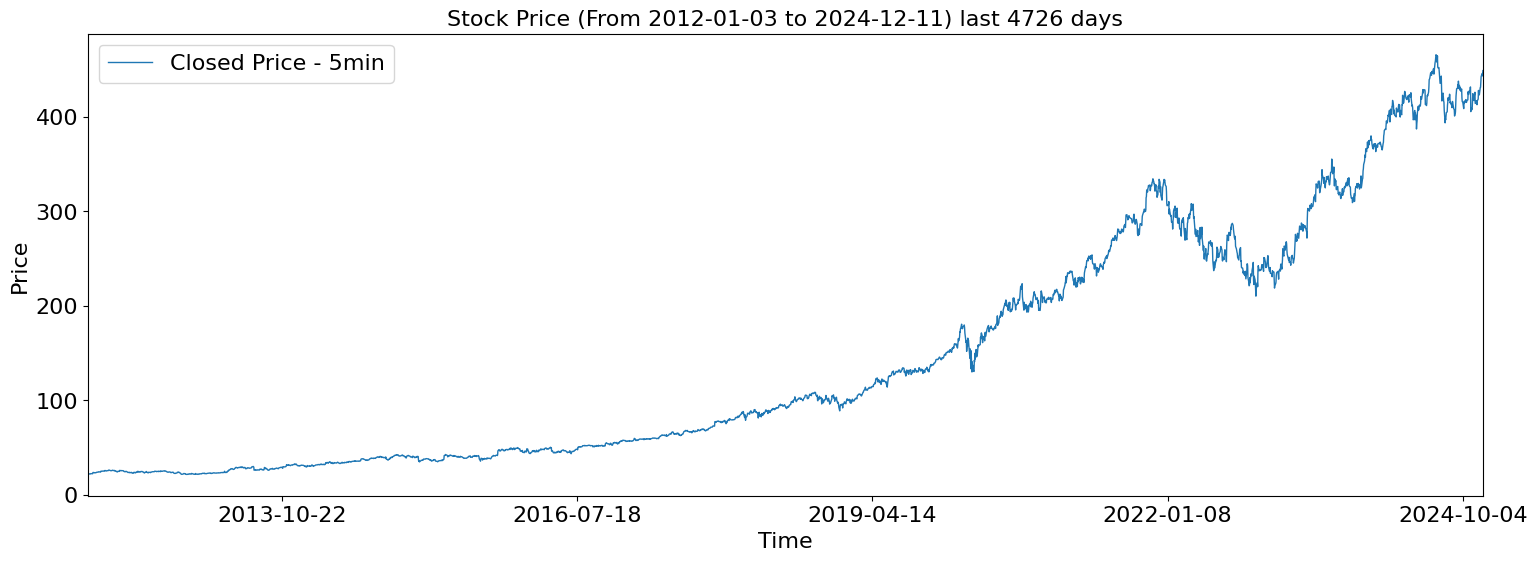

In [ ]:
"""
Description:
- Plots the historical closed price of a cryptocurrency.
- The x-axis is formatted with a custom date formatter.

Parameters:
- data (pd.DataFrame): Historical price data with timestamps and closed prices.
- dateformat (str): Custom date format for timestamp display.
"""

import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime

dateformat = '%Y-%m-%d'

dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index]

plt.gca().xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
plt.plot(dates, list(data['Close']), label = 'Closed Price - 5min', linewidth = 1)
plt.xlim([dates[0], dates[-1]])
plt.title('Stock Price (From {} to {}) last {} days'
.format(data.index[0], data.index[-1], (datetime.strptime(data.index[-1], dateformat) - datetime.strptime(data.index[0], dateformat)).days))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Model Training Configuration

In [ ]:
"""
Description:
- Configuration settings for training the time series prediction models.

Parameters:
- test_split_percentage (float): Percentage of data reserved for testing.
- validation_split_percentage (float): Percentage of training data used for validation.
- epochs (int): Number of training epochs.
- batch_size (int): Batch size for training.
- verbose (int): Verbosity level during training (0 for silent).
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): Symbol pairs for the stock prices dataset.
"""
# test_split_percentage = .8
test_split_percentage = round(1 - len(filtered_data) / len(data), 3)
validation_split_percentage = .2
epochs = 50
batch_size = 32
verbose = 0
analysis_duration = 6
price_pairs = 'TRXUSD'

### Price Preprocessing and Normalization Parameters

In [ ]:
"""
Parameters for normalizing cryptocurrency closing prices:
- alpha (float): Scaling factor for the minimum value.
- beta (float): Scaling factor for the maximum value.
- close_price (numpy.ndarray): NumPy array containing closing prices.
- data_len (int): Total length of the price data.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
"""
alpha, beta = .8, 1.2
close_price = pd.Series.to_numpy(data['Close'])
data_len = close_price.shape[0]
train_len = int((test_split_percentage * data_len) // analysis_duration * analysis_duration)
test_len = int(data_len - train_len)
close_minmax = np.array([alpha * close_price.min(), beta * close_price.max()], dtype = 'float32')

### Price Normalization and Save

In [ ]:
"""
Description:
- Normalize the closing prices of cryptocurrency data and save the min-max normalization range.

Parameters:
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- data_len (int): Total length of the price data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
close_price = close_price.reshape((data_len, 1)).astype('float32')
close_price = normalize(close_price, close_minmax)
np.save(f'close_minmax_{price_pairs.lower()}.npy', close_minmax)

In [ ]:
# Normalize other columns

# Dictionary to store min-max values for each column
minmax_dict = {}

# Normalize all numerical columns except "Close"
for col in data.select_dtypes(include=[np.number]).columns:
    if col != "Close":  # Skip the "Close" column
        min_val = data[col].min()
        max_val = data[col].max()
        minmax_dict[col] = np.array([min_val, max_val])  # Store min-max values

        data[col] = normalize(data[col].values, minmax_dict[col])  # Normalize column

# Save min-max values for future denormalization
np.save("minmax_values.npy", minmax_dict)

# Save the normalized dataset
data.to_csv("normalized_data.csv", index=False)

In [ ]:
# check whether the dataset is normalized or not
data

Close      High       Low      Open    Volume       ci1  \
Date                                                                       
2012-01-03   21.120089  0.000000  0.000000  0.000000  0.237781       NaN   
2012-01-04   21.617134  0.000904  0.000696  0.000479  0.303276       NaN   
2012-01-05   21.838041  0.001364  0.001607  0.001474  0.201889       NaN   
2012-01-06   22.177284  0.002179  0.002035  0.001740  0.381862       NaN   
2012-01-09   21.885370  0.002020  0.002375  0.002664  0.216932       NaN   
...                ...       ...       ...       ...       ...       ...   
2024-12-05  442.619995  0.950790  0.939965  0.938533  0.059220  0.166667   
2024-12-06  443.570007  0.954024  0.952638  0.948392  0.047283  0.208333   
2024-12-09  446.019989  0.959031  0.949764  0.949067  0.048625  0.000000   
2024-12-10  443.329987  0.961928  0.952253  0.953096  0.045825  0.250000   
2024-12-11  448.989990  0.963568  0.957798  0.952331  0.048857  0.000000   

                 ci2       ci3       ci4       ci5       ci6       ci7  
Date                                                                    
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN  
2012-01-04       NaN       NaN       NaN       NaN       NaN       NaN  
2012-01-05       NaN       NaN       NaN       NaN       NaN       NaN  
2012-01-06       NaN       NaN       NaN       NaN       NaN       NaN  
2012-01-09       NaN       NaN       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...       ...       ...  
2024-12-05  0.500000  0.500000  0.000000  0.416667  0.500000  0.416667  
2024-12-06  0.208333  0.000000  0.181818  0.166667  0.250000  0.000000  
2024-12-09  0.250000  0.125000  0.181818  0.125000  0.208333  0.208333  
2024-12-10  0.125000  0.250000  0.136364  0.166667  0.333333  0.000000  
2024-12-11  0.166667  0.166667  0.136364  0.125000  0.125000  0.125000  

[3257 rows x 12 columns]

### Data Splitting for Training and Validation

In [ ]:
"""
Description:
- Split the time series data into training, testing, and validation sets for model training.

Parameters:
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and testing data split.
- X_val, y_val (numpy.ndarray): Validation data split from the training set.
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- validation_split_percentage (float): Percentage of training data used for validation.
- analyzing_duration (int): Duration of the sequence used for prediction.
"""
X_train, y_train, X_test, y_test = split_data(close_price = close_price, training_len = train_len, testing_len = test_len, analyzing_duration = analysis_duration)
X_val, y_val = X_train[int(train_len - (validation_split_percentage * train_len)):], y_train[int(train_len - (validation_split_percentage * train_len)):]
X_train, y_train = X_train[:int(train_len - (validation_split_percentage * train_len))], y_train[:int(train_len - (validation_split_percentage * train_len))]

## Transfer Learning with Probabilistic GRU Model (train on TRX price data)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_poisson_deviance as mpd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse

"""
Description:
- Performs transfer learning by loading a pre-trained Probabilistic GRU model.
- Transfer learning is a machine learning technique where knowledge gained from one model (source model) is applied to another related model (target model).
- In this code, transfer learning is implemented for time series forecasting using a pre-trained Probabilistic GRU model.
- The source model, 'best_BTCPred_gru_prob,' is trained on Bitcoin price data.
- The target model, 'best_TRXPred_gru_prob,' is trained on Tron price data using the weights transferred from the source model.
- This approach leverages the learned patterns and features from the Bitcoin data to enhance the training of the Tron model.
- The transfer_model() function loads the pre-trained model, freezes the layers up to the output layer, and compiles it for training.
- The model is then trained on Tron data, and the performance is evaluated and recorded in transfer_model_test_result.
- Various metrics such as R2 score, mean absolute percentage error, explained variance score, etc., are used to assess the model's performance.


Parameters:
- K.clear_session(): Clears the Keras session to release resources.
- m_name_ (str): Model name for identification.
- transfer_model_test_result (dict): Dictionary to store evaluation results.
- model (tf.keras.Model): Transfer learning model loaded from a pre-trained model.
- out_path_best (str): Path to store the best model during training.
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and test data.
- epochs, batch_size, verbose (int): Training parameters.
- close_minmax (numpy.ndarray): Min-max values for denormalization.

Returns:
- None: The transfer learning model is trained, evaluated, and results are recorded in transfer_model_test_result.
"""
K.clear_session()
m_name_ = 'best_TRXPred_gru_prob'
transfer_model_test_result = {}
transfer_model_test_result.update({f'{m_name_}': {}})
model = transfer_model()
model.summary(line_length = 140)

tbcall = TrainingCallback(model_dir = out_path_best,
                          valid_data = (X_val, y_val),
                          model = model, model_name = m_name_)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=verbose, mode='min', restore_best_weights=True)

model_history = model.fit(X_train, y_train,
                          epochs = epochs, batch_size = batch_size, callbacks = [tbcall, early_stopping], verbose = verbose)

model.save(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')
best_model = load_model(f'{out_path_best}/{m_name_}.keras', safe_mode = False)

test_p = model.predict(X_test)
test_p_best = best_model.predict(X_test)
y_pred_best.update({f'{m_name_}': test_p_best})

transfer_model_test_result[f'{m_name_}'].update({'r2_score': float(r2_score(denormalize(y_test, close_minmax),
                                                                            denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_absolute_percentage_error': float(mape(denormalize(y_test, close_minmax),
                                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'explained_variance_score': float(evs(denormalize(y_test, close_minmax),
                                                                                       denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_squared_log_error': float(msle(denormalize(y_test, close_minmax),
                                                                                      denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_poisson_deviance': float(mpd(denormalize(y_test, close_minmax),
                                                                                    denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'max_error': float(max_error(denormalize(y_test, close_minmax),
                                                                              denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_absolute_error': float(mae(denormalize(y_test, close_minmax),
                                                                                  denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'root_mean_squared_error': float(rmse(denormalize(y_test, close_minmax),
                                                                                       denormalize(test_p_best.mean(axis = 1), close_minmax)))})

Model: "best_TRXPred_gru_prob"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 close_price (InputLayer)                                      [(None, 6, 1)]                                          0                    
                                                                                                                                            
 gru (GRU)                                                     (None, 256)                                             198912               
                                                                                                                                            
 batch_normalization (BatchNormalization)                      (None, 256)                                             1024

Training started. Checking the best model based on the highest R2-score is On
19/19 [==============================] - 1s 4ms/step


Epoch: 01/50 | 0:00:03 | Price R2 score: 0.9475 | loss: 1193.7577 | Model Weights Changed And Best Model Saved
19/19 [==============================] - 0s 5ms/step
Epoch: 02/50 | 0:00:00 | Price R2 score: -1.3626 | loss: 753.1508 | Model Weights Not Changed
19/19 [==============================] - 0s 4ms/step
Epoch: 03/50 | 0:00:00 | Price R2 score: -2.1643 | loss: 452.5575 | Model Weights Not Changed
19/19 [==============================] - 0s 4ms/step
Epoch: 04/50 | 0:00:00 | Price R2 score: -1.7592 | loss: 258.2413 | Model Weights Not Changed
19/19 [==============================] - 0s 6ms/step
Epoch: 05/50 | 0:00:00 | Price R2 score: -0.4034 | loss: 136.1086 | Model Weights Not Changed
19/19 [==============================] - 0s 7ms/step
Epoch: 06/50 | 0:00:01 | Price R2 score: 0.9569 | loss: 69.3708 | Model Weights Changed And Best Model Saved
19/19 [==============================] - 0s 6ms/step
Epoch: 07/50 | 0:00:01 | Price R2 score: 0.9799 | loss: 32.9735 | Model Weights Change

# Model Evaluation and Visualisation

## Prediction visualization

In [ ]:
plot_prediction(y_train, y_test, y_pred_best[m_name_], model_name = m_name_.replace('_', ' '))

## Residuals vs. Predicted Values Visualization

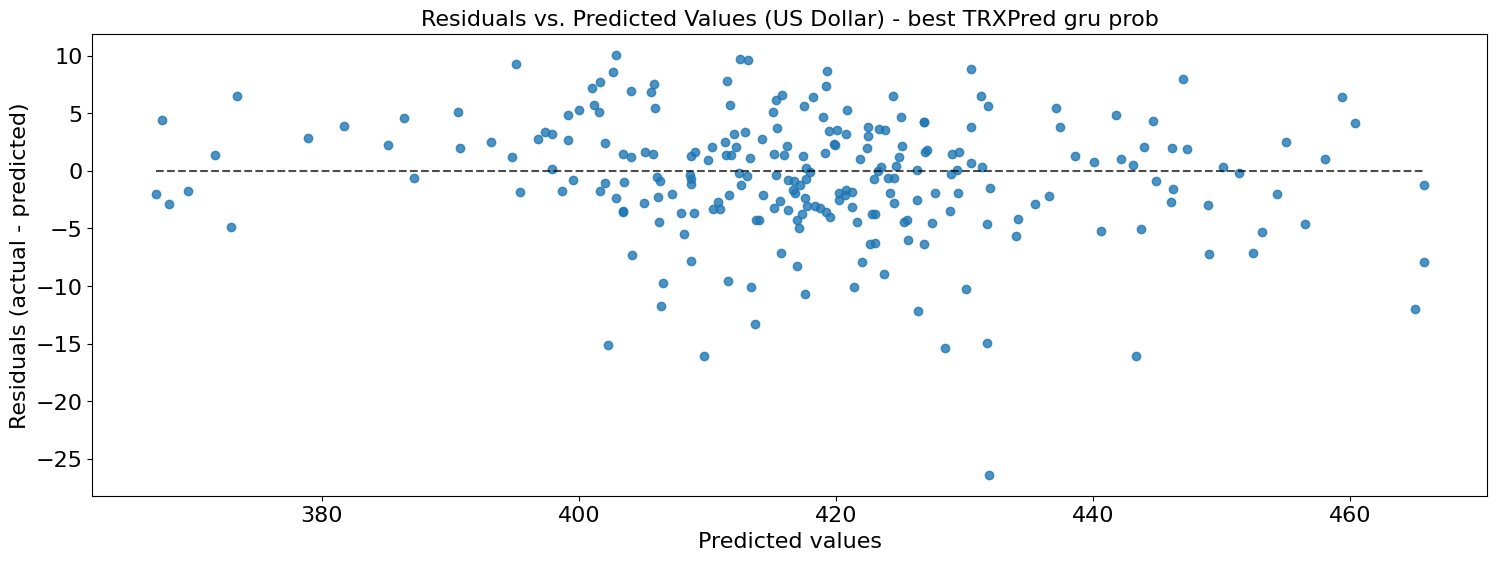

In [ ]:
PredictionErrorDisplay.from_predictions(y_true = denormalize(y_test, close_minmax),
                                        y_pred = denormalize(y_pred_best[m_name_].mean(axis = 1), close_minmax)[:, np.newaxis])
plt.title(f'Residuals vs. Predicted Values (US Dollar) - {m_name_.replace("_", " ")}')
plt.show()

## Models Evaluation Results

In [ ]:
df = pd.DataFrame.from_dict(transfer_model_test_result, orient = 'index')
df

r2_score  mean_absolute_percentage_error  \
best_TRXPred_gru_prob  0.910436                         0.00963   

                       explained_variance_score  mean_squared_log_error  \
best_TRXPred_gru_prob                  0.911453                0.000163   

                       mean_poisson_deviance  max_error  mean_absolute_error  \
best_TRXPred_gru_prob                0.06822  26.383209             4.004806   

                       root_mean_squared_error  
best_TRXPred_gru_prob                  5.34182

In [ ]:
# Denormalize the data
y_true = denormalize(y_test, close_minmax)
y_pred = denormalize(y_pred_best[m_name_].mean(axis = 1), close_minmax)[:, np.newaxis]

# Calculate Metrics
mae = np.mean(np.abs(y_true - y_pred))
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Display metrics in a dataframe
metrics_df = pd.DataFrame({'MAE': [f'{mae:.2f}'],
                           'RMSE': [f'{rmse:.2f}'],
                           'MAPE': [f'{mape:.2f}%']})
metrics_df

MAE  RMSE   MAPE
0  4.00  5.34  0.96%

# References

Golnari, A., Komeili, M. H., & Azizi, Z. (2024). Probabilistic deep learning and transfer learning for robust cryptocurrency price prediction. Expert Systems with Applications, 255, 124404. https://doi.org/10.1016/j.eswa.2024.124404